<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Day2.do.txt --no_mako -->
<!-- dom:TITLE: Intepretation of Lasso and Ridge Regression -->

# Intepretation of Lasso and Ridge Regression
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and Facility for Rare Isotope Beams, Michigan State University, USA

Date: **October 10, 2022**

## Preprocessing our data

Before we proceed however, we will discuss how to preprocess our
data. Till now and in connection with our previous examples we have
not met so many cases where we are too sensitive to the scaling of our
data. Normally the data may need a rescaling and/or may be sensitive
to extreme values. Scaling the data renders our inputs much more
suitable for the algorithms we want to employ.

For data sets gathered for real world applications, it is rather normal that
different features have very different units and
numerical scales. For example, a data set detailing health habits may include
features such as **age** in the range $0-80$, and **caloric intake** of order $2000$.
Many machine learning methods sensitive to the scales of the features and may perform poorly if they
are very different scales. Therefore, it is typical to scale
the features in a way to avoid such outlier values.

## Functionality in Scikit-Learn

**Scikit-Learn** has several functions which allow us to rescale the
data, normally resulting in much better results in terms of various
accuracy scores.  The **StandardScaler** function in **Scikit-Learn**
ensures that for each feature/predictor we study the mean value is
zero and the variance is one (every column in the design/feature
matrix).  This scaling has the drawback that it does not ensure that
we have a particular maximum or minimum in our data set. Another
function included in **Scikit-Learn** is the **MinMaxScaler** which
ensures that all features are exactly between $0$ and $1$. The

## More preprocessing

The **Normalizer** scales each data
point such that the feature vector has a euclidean length of one. In other words, it
projects a data point on the circle (or sphere in the case of higher dimensions) with a
radius of 1. This means every data point is scaled by a different number (by the
inverse of it’s length).
This normalization is often used when only the direction (or angle) of the data matters,
not the length of the feature vector.

The **RobustScaler** works similarly to the StandardScaler in that it
ensures statistical properties for each feature that guarantee that
they are on the same scale. However, the RobustScaler uses the median
and quartiles, instead of mean and variance. This makes the
RobustScaler ignore data points that are very different from the rest
(like measurement errors). These odd data points are also called
outliers, and might often lead to trouble for other scaling
techniques.

## Frequently used scaling functions

Many features are often scaled using standardization to improve performance. In **Scikit-Learn** this is given by the **StandardScaler** function as discussed above. It is easy however to write your own. 
Mathematically, this involves subtracting the mean and divide by the standard deviation over the data set, for each feature:

$$
x_j^{(i)} \rightarrow \frac{x_j^{(i)} - \overline{x}_j}{\sigma(x_j)},
$$

where $\overline{x}_j$ and $\sigma(x_j)$ are the mean and standard deviation, respectively,  of the feature $x_j$.
This ensures that each feature has zero mean and unit standard deviation.  For data sets where  we do not have the standard deviation or don't wish to calculate it,  it is then common to simply set it to one.

## Example of own Standard scaling

Let us consider the following vanilla example where we use both
**Scikit-Learn** and write our own function as well.  We produce a
simple test design matrix with random numbers. Each column could then
represent a specific feature whose mean value is subracted.

In [1]:
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import numpy as np
import pandas as pd
from IPython.display import display
np.random.seed(100)
# setting up a 10 x 5 matrix
rows = 10
cols = 5
X = np.random.randn(rows,cols)
XPandas = pd.DataFrame(X)
display(XPandas)
print(XPandas.mean())
print(XPandas.std())
XPandas = (XPandas -XPandas.mean())
display(XPandas)
#  This option does not include the standard deviation
scaler = StandardScaler(with_std=False)
scaler.fit(X)
Xscaled = scaler.transform(X)
display(XPandas-Xscaled)

Small exercise: perform the standard scaling by including the standard deviation and compare with what Scikit-Learn gives.

## Min-Max Scaling

Another commonly used scaling method is min-max scaling. This is very
useful for when we want the features to lie in a certain interval. To
scale the feature $x_j$ to the interval $[a, b]$, we can apply the
transformation

$$
x_j^{(i)} \rightarrow (b-a)\frac{x_j^{(i)} - \min(x_j)}{\max(x_j) - \min(x_j)} - a
$$

where $\min(x_j)$ and $\max(x_j)$ return the minimum and maximum value of $x_j$ over the data set, respectively.

## To think about, first part

When you are comparing your own code with for example **Scikit-Learn**'s
library, there are some technicalities to keep in mind.  The examples
here demonstrate some of these aspects with potential pitfalls.

The discussion here focuses on the role of the intercept, how we can
set up the design matrix, what scaling we should use and other topics
which tend  confuse us.

The intercept can be interpreted as the expected value of our
target/output variables when all other predictors are set to zero.
Thus, if we cannot assume that the expected outputs/targets are zero
when all predictors are zero (the columns in the design matrix), it
may be a bad idea to implement a model which penalizes the intercept.
Furthermore, in for example Ridge and Lasso regression, the default solutions
from the library **Scikit-Learn** (when not shrinking $\beta_0$) for the unknown parameters
$\boldsymbol{\beta}$, are derived under the assumption that both $\boldsymbol{y}$ and
$\boldsymbol{X}$ are zero centered, that is we subtract the mean values.

## More thinking

If our predictors represent different scales, then it is important to
standardize the design matrix $\boldsymbol{X}$ by subtracting the mean of each
column from the corresponding column and dividing the column with its
standard deviation. Most machine learning libraries do this as a default. This means that if you compare your code with the results from a given library,
the results may differ. 

The
[Standadscaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
function in **Scikit-Learn** does this for us.  For the data sets we
have been studying in our various examples, the data are in many cases
already scaled and there is no need to scale them. You as a user of different machine learning algorithms, should always perform  a
survey of your data, with a critical assessment of them in case you need to scale the data.

If you need to scale the data, not doing so will give an *unfair*
penalization of the parameters since their magnitude depends on the
scale of their corresponding predictor.

Suppose as an example that you 
you have an input variable given by the heights of different persons.
Human height might be measured in inches or meters or
kilometers. If measured in kilometers, a standard linear regression
model with this predictor would probably give a much bigger
coefficient term, than if measured in millimeters.
This can clearly lead to problems in evaluating the cost/loss functions.

## Still thinking

Keep in mind that when you transform your data set before training a model, the same transformation needs to be done
on your eventual new data set  before making a prediction. If we translate this into a Python code, it would could be implemented as follows

In [2]:
#Model training, we compute the mean value of y and X
y_train_mean = np.mean(y_train)
X_train_mean = np.mean(X_train,axis=0)
X_train = X_train - X_train_mean
y_train = y_train - y_train_mean

# The we fit our model with the training data
trained_model = some_model.fit(X_train,y_train)


#Model prediction, we need also to transform our data set used for the prediction.
X_test = X_test - X_train_mean #Use mean from training data
y_pred = trained_model(X_test)
y_pred = y_pred + y_train_mean

What does this mean? And why do we insist on all this? Let us look at some examples.

## Linear Regression code, Intercept handling first

This code shows a simple first-order fit to a data set using the above transformed data, where we consider the role of the intercept first, by either excluding it or including it (*code example thanks to  Øyvind Sigmundson Schøyen*). Here our scaling of the data is done by subtracting the mean values only.
Note also that we do not split the data into training and test.

True beta: [2, 0.5, 3.7]
Fitted beta: [2.08376632 0.19569961 3.97898392]
Sklearn fitted beta: [2.08376632 0.19569961 3.97898392]
MSE with intercept column
0.004113634617443142
MSE with intercept column from SKL
0.004113634617443129
Manual intercept: 2.0837663229239056
Fitted beta (wiothout intercept): [0.19569961 3.97898392]
Sklearn intercept: 2.0837663229239043
Sklearn fitted beta (without intercept): [0.19569961 3.97898392]
MSE with Manual intercept
0.004113634617443132
MSE with Sklearn intercept
0.00411363461744314


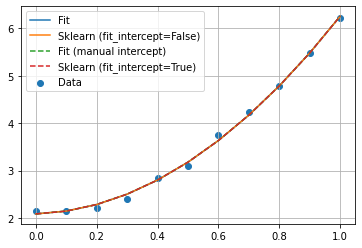

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


np.random.seed(2021)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


def fit_beta(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y


true_beta = [2, 0.5, 3.7]

x = np.linspace(0, 1, 11)
y = np.sum(
    np.asarray([x ** p * b for p, b in enumerate(true_beta)]), axis=0
) + 0.1 * np.random.normal(size=len(x))

degree = 3
X = np.zeros((len(x), degree))

# Include the intercept in the design matrix
for p in range(degree):
    X[:, p] = x ** p

beta = fit_beta(X, y)

# Intercept is included in the design matrix
skl = LinearRegression(fit_intercept=False).fit(X, y)

print(f"True beta: {true_beta}")
print(f"Fitted beta: {beta}")
print(f"Sklearn fitted beta: {skl.coef_}")
ypredictOwn = X @ beta
ypredictSKL = skl.predict(X)
print(f"MSE with intercept column")
print(MSE(y,ypredictOwn))
print(f"MSE with intercept column from SKL")
print(MSE(y,ypredictSKL))


plt.figure()
plt.scatter(x, y, label="Data")
plt.plot(x, X @ beta, label="Fit")
plt.plot(x, skl.predict(X), label="Sklearn (fit_intercept=False)")


# Do not include the intercept in the design matrix
X = np.zeros((len(x), degree - 1))

for p in range(degree - 1):
    X[:, p] = x ** (p + 1)

# Intercept is not included in the design matrix
skl = LinearRegression(fit_intercept=True).fit(X, y)

# Use centered values for X and y when computing coefficients
y_offset = np.average(y, axis=0)
X_offset = np.average(X, axis=0)

beta = fit_beta(X - X_offset, y - y_offset)
intercept = np.mean(y_offset - X_offset @ beta)

print(f"Manual intercept: {intercept}")
print(f"Fitted beta (wiothout intercept): {beta}")
print(f"Sklearn intercept: {skl.intercept_}")
print(f"Sklearn fitted beta (without intercept): {skl.coef_}")
ypredictOwn = X @ beta
ypredictSKL = skl.predict(X)
print(f"MSE with Manual intercept")
print(MSE(y,ypredictOwn+intercept))
print(f"MSE with Sklearn intercept")
print(MSE(y,ypredictSKL))

plt.plot(x, X @ beta + intercept, "--", label="Fit (manual intercept)")
plt.plot(x, skl.predict(X), "--", label="Sklearn (fit_intercept=True)")
plt.grid()
plt.legend()

plt.show()

The intercept is the value of our output/target variable
when all our features are zero and our function crosses the $y$-axis (for a one-dimensional case). 

Printing the MSE, we see first that both methods give the same MSE, as
they should.  However, when we move to for example Ridge regression,
the way we treat the intercept may give a larger or smaller MSE,
meaning that the MSE can be penalized by the value of the
intercept. Not including the intercept in the fit, means that the
regularization term does not include $\beta_0$. For different values
of $\lambda$, this may lead to differeing MSE values. 

To remind the reader, the regularization term, with the intercept in Ridge regression is given by

$$
\lambda \vert\vert \boldsymbol{\beta} \vert\vert_2^2 = \lambda \sum_{j=0}^{p-1}\beta_j^2,
$$

but when we take out the intercept, this equation becomes

$$
\lambda \vert\vert \boldsymbol{\beta} \vert\vert_2^2 = \lambda \sum_{j=1}^{p-1}\beta_j^2.
$$

For Lasso regression we have

$$
\lambda \vert\vert \boldsymbol{\beta} \vert\vert_1 = \lambda \sum_{j=1}^{p-1}\vert\beta_j\vert.
$$

It means that, when scaling the design matrix and the outputs/targets, by subtracting the mean values, we have an optimization problem which is not penalized by the intercept. The MSE value can then be smaller since it focuses only on the remaining quantities. If we however bring back the intercept, we will get a MSE which then contains the intercept.

## Code Examples

Armed with this wisdom, we attempt first to simply set the intercept equal to **False** in our implementation of Ridge regression for our well-known  vanilla data set.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

n = 100
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)

Maxpolydegree = 20
X = np.zeros((n,Maxpolydegree))
#We include explicitely the intercept column
for degree in range(Maxpolydegree):
    X[:,degree] = x**degree
# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

p = Maxpolydegree
I = np.eye(p,p)
# Decide which values of lambda to use
nlambdas = 6
MSEOwnRidgePredict = np.zeros(nlambdas)
MSERidgePredict = np.zeros(nlambdas)
lambdas = np.logspace(-4, 2, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    OwnRidgeBeta = np.linalg.pinv(X_train.T @ X_train+lmb*I) @ X_train.T @ y_train
    # Note: we include the intercept column and no scaling
    RegRidge = linear_model.Ridge(lmb,fit_intercept=False)
    RegRidge.fit(X_train,y_train)
    # and then make the prediction
    ytildeOwnRidge = X_train @ OwnRidgeBeta
    ypredictOwnRidge = X_test @ OwnRidgeBeta
    ytildeRidge = RegRidge.predict(X_train)
    ypredictRidge = RegRidge.predict(X_test)
    MSEOwnRidgePredict[i] = MSE(y_test,ypredictOwnRidge)
    MSERidgePredict[i] = MSE(y_test,ypredictRidge)
    print("Beta values for own Ridge implementation")
    print(OwnRidgeBeta)
    print("Beta values for Scikit-Learn Ridge implementation")
    print(RegRidge.coef_)
    print("MSE values for own Ridge implementation")
    print(MSEOwnRidgePredict[i])
    print("MSE values for Scikit-Learn Ridge implementation")
    print(MSERidgePredict[i])

# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSEOwnRidgePredict, 'r', label = 'MSE own Ridge Test')
plt.plot(np.log10(lambdas), MSERidgePredict, 'g', label = 'MSE Ridge Test')

plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

The results here agree when we force **Scikit-Learn**'s Ridge function to include the first column in our design matrix.
We see that the results agree very well. Here we have thus explicitely included the intercept column in the design matrix.
What happens if we do not include the intercept in our fit?
Let us see how we can change this code by zero centering (thanks to Stian Bilek for inpouts here).

## Taking out the mean

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n
# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(315)

n = 100
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)

Maxpolydegree = 20
X = np.zeros((n,Maxpolydegree-1))

for degree in range(1,Maxpolydegree): #No intercept column
    X[:,degree-1] = x**(degree)

# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#For our own implementation, we will need to deal with the intercept by centering the design matrix and the target variable
X_train_mean = np.mean(X_train,axis=0)
#Center by removing mean from each feature
X_train_scaled = X_train - X_train_mean 
X_test_scaled = X_test - X_train_mean
#The model intercept (called y_scaler) is given by the mean of the target variable (IF X is centered)
#Remove the intercept from the training data.
y_scaler = np.mean(y_train)           
y_train_scaled = y_train - y_scaler   

p = Maxpolydegree-1
I = np.eye(p,p)
# Decide which values of lambda to use
nlambdas = 6
MSEOwnRidgePredict = np.zeros(nlambdas)
MSERidgePredict = np.zeros(nlambdas)

lambdas = np.logspace(-4, 2, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    OwnRidgeBeta = np.linalg.pinv(X_train_scaled.T @ X_train_scaled+lmb*I) @ X_train_scaled.T @ (y_train_scaled)
    intercept_ = y_scaler - X_train_mean@OwnRidgeBeta #The intercept can be shifted so the model can predict on uncentered data
    #Add intercept to prediction
    ypredictOwnRidge = X_test_scaled @ OwnRidgeBeta + y_scaler 
    RegRidge = linear_model.Ridge(lmb)
    RegRidge.fit(X_train,y_train)
    ypredictRidge = RegRidge.predict(X_test)
    MSEOwnRidgePredict[i] = MSE(y_test,ypredictOwnRidge)
    MSERidgePredict[i] = MSE(y_test,ypredictRidge)
    print("Beta values for own Ridge implementation")
    print(OwnRidgeBeta) #Intercept is given by mean of target variable
    print("Beta values for Scikit-Learn Ridge implementation")
    print(RegRidge.coef_)
    print('Intercept from own implementation:')
    print(intercept_)
    print('Intercept from Scikit-Learn Ridge implementation')
    print(RegRidge.intercept_)
    print("MSE values for own Ridge implementation")
    print(MSEOwnRidgePredict[i])
    print("MSE values for Scikit-Learn Ridge implementation")
    print(MSERidgePredict[i])


# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSEOwnRidgePredict, 'b--', label = 'MSE own Ridge Test')
plt.plot(np.log10(lambdas), MSERidgePredict, 'g--', label = 'MSE SL Ridge Test')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

We see here, when compared to the code which includes explicitely the
intercept column, that our MSE value is actually smaller. This is
because the regularization term does not include the intercept value
$\beta_0$ in the fitting.  This applies to Lasso regularization as
well.  It means that our optimization is now done only with the
centered matrix and/or vector that enter the fitting procedure. Note
also that the problem with the intercept occurs mainly in these type
of polynomial fitting problem.

## Mathematical Interpretation of Ordinary Least Squares

What is presented here is a mathematical analysis of various regression algorithms (ordinary least  squares, Ridge and Lasso Regression). The analysis is based on an important algorithm in linear algebra, the so-called Singular Value Decomposition (SVD). 

We have shown that in ordinary least squares the optimal parameters $\beta$ are given by

$$
\hat{\boldsymbol{\beta}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

The **hat** over $\boldsymbol{\beta}$ means we have the optimal parameters after minimization of the cost function.

This means that our best model is defined as

$$
\tilde{\boldsymbol{y}}=\boldsymbol{X}\hat{\boldsymbol{\beta}} = \boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

We now define a matrix

$$
\boldsymbol{A}=\boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T.
$$

We can rewrite

$$
\tilde{\boldsymbol{y}}=\boldsymbol{X}\hat{\boldsymbol{\beta}} = \boldsymbol{A}\boldsymbol{y}.
$$

The matrix $\boldsymbol{A}$ has the important property that $\boldsymbol{A}^2=\boldsymbol{A}$. This is the definition of a projection matrix.
We can then interpret our optimal model $\tilde{\boldsymbol{y}}$ as being represented  by an orthogonal  projection of $\boldsymbol{y}$ onto a space defined by the column vectors of $\boldsymbol{X}$.  In our case here the matrix $\boldsymbol{A}$ is a square matrix. If it is a general rectangular matrix we have an oblique projection matrix.

## Residual Error

We have defined the residual error as

$$
\boldsymbol{\epsilon}=\boldsymbol{y}-\tilde{\boldsymbol{y}}=\left[\boldsymbol{I}-\boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\right]\boldsymbol{y}.
$$

The residual errors are then the projections of $\boldsymbol{y}$ onto the orthogonal component of the space defined by the column vectors of $\boldsymbol{X}$.

## Simple case

If the matrix $\boldsymbol{X}$ is an orthogonal (or unitary in case of complex values) matrix, we have

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{X}\boldsymbol{X}^T = \boldsymbol{I}.
$$

In this case the matrix $\boldsymbol{A}$ becomes

$$
\boldsymbol{A}=\boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T)=\boldsymbol{I},
$$

and we have the obvious case

$$
\boldsymbol{\epsilon}=\boldsymbol{y}-\tilde{\boldsymbol{y}}=0.
$$

This serves also as a useful test of our codes.

## The singular value decomposition

The examples we have looked at so far are cases where we normally can
invert the matrix $\boldsymbol{X}^T\boldsymbol{X}$. Using a polynomial expansion where we fit of various functions leads to
row vectors of the design matrix which are essentially orthogonal due
to the polynomial character of our model. Obtaining the inverse of the
design matrix is then often done via a so-called LU, QR or Cholesky
decomposition.

As we will also see in the first project, 
this may
however not the be case in general and a standard matrix inversion
algorithm based on say LU, QR or Cholesky decomposition may lead to singularities. We will see examples of this below.

There is however a way to circumvent this problem and also
gain some insights about the ordinary least squares approach, and
later shrinkage methods like Ridge and Lasso regressions.

This is given by the **Singular Value Decomposition** (SVD) algorithm,
perhaps the most powerful linear algebra algorithm.  The SVD provides
a numerically stable matrix decomposition that is used in a large
swath oc applications and the decomposition is always stable
numerically.

In machine learning it plays a central role in dealing with for
example design matrices that may be near singular or singular.
Furthermore, as we will see here, the singular values can be related
to the covariance matrix (and thereby the correlation matrix) and in
turn the variance of a given quantity. It plays also an important role
in the principal component analysis where high-dimensional data can be
reduced to the statistically relevant features.

## Linear Regression Problems

One of the typical problems we encounter with linear regression, in particular 
when the matrix $\boldsymbol{X}$ (our so-called design matrix) is high-dimensional, 
are problems with near singular or singular matrices. The column vectors of $\boldsymbol{X}$ 
may be linearly dependent, normally referred to as super-collinearity.  
This means that the matrix may be rank deficient and it is basically impossible to 
to model the data using linear regression. As an example, consider the matrix

$$
\begin{align*}
\mathbf{X} & =  \left[
\begin{array}{rrr}
1 & -1 & 2
\\
1 & 0 & 1
\\
1 & 2  & -1
\\
1 & 1  & 0
\end{array} \right]
\end{align*}
$$

The columns of $\boldsymbol{X}$ are linearly dependent. We see this easily since the 
the first column is the row-wise sum of the other two columns. The rank (more correct,
the column rank) of a matrix is the dimension of the space spanned by the
column vectors. Hence, the rank of $\mathbf{X}$ is equal to the number
of linearly independent columns. In this particular case the matrix has rank 2.

Super-collinearity of an $(n \times p)$-dimensional design matrix $\mathbf{X}$ implies
that the inverse of the matrix $\boldsymbol{X}^T\boldsymbol{X}$ (the matrix we need to invert to solve the linear regression equations) is non-invertible. If we have a square matrix that does not have an inverse, we say this matrix singular. The example here demonstrates this

$$
\begin{align*}
\boldsymbol{X} & =  \left[
\begin{array}{rr}
1 & -1
\\
1 & -1
\end{array} \right].
\end{align*}
$$

We see easily that  $\mbox{det}(\boldsymbol{X}) = x_{11} x_{22} - x_{12} x_{21} = 1 \times (-1) - 1 \times (-1) = 0$. Hence, $\mathbf{X}$ is singular and its inverse is undefined.
This is equivalent to saying that the matrix $\boldsymbol{X}$ has at least an eigenvalue which is zero.

## Fixing the singularity

If our design matrix $\boldsymbol{X}$ which enters the linear regression problem

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\boldsymbol{\beta}  =  (\boldsymbol{X}^{T} \boldsymbol{X})^{-1} \boldsymbol{X}^{T} \boldsymbol{y},
\label{_auto1} \tag{1}
\end{equation}
$$

has linearly dependent column vectors, we will not be able to compute the inverse
of $\boldsymbol{X}^T\boldsymbol{X}$ and we cannot find the parameters (estimators) $\beta_i$. 
The estimators are only well-defined if $(\boldsymbol{X}^{T}\boldsymbol{X})^{-1}$ exits. 
This is more likely to happen when the matrix $\boldsymbol{X}$ is high-dimensional. In this case it is likely to encounter a situation where 
the regression parameters $\beta_i$ cannot be estimated.

A cheap  *ad hoc* approach is  simply to add a small diagonal component to the matrix to invert, that is we change

$$
\boldsymbol{X}^{T} \boldsymbol{X} \rightarrow \boldsymbol{X}^{T} \boldsymbol{X}+\lambda \boldsymbol{I},
$$

where $\boldsymbol{I}$ is the identity matrix.  When we discuss **Ridge** regression this is actually what we end up evaluating. The parameter $\lambda$ is called a hyperparameter. More about this later.

## Basic math of the SVD

From standard linear algebra we know that a square matrix $\boldsymbol{X}$ can be diagonalized if and only it is 
a so-called [normal matrix](https://en.wikipedia.org/wiki/Normal_matrix), that is if $\boldsymbol{X}\in {\mathbb{R}}^{n\times n}$
we have $\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{X}^T\boldsymbol{X}$ or if $\boldsymbol{X}\in {\mathbb{C}}^{n\times n}$ we have $\boldsymbol{X}\boldsymbol{X}^{\dagger}=\boldsymbol{X}^{\dagger}\boldsymbol{X}$.
The matrix has then a set of eigenpairs

$$
(\lambda_1,\boldsymbol{u}_1),\dots, (\lambda_n,\boldsymbol{u}_n),
$$

and the eigenvalues are given by the diagonal matrix

$$
\boldsymbol{\Sigma}=\mathrm{Diag}(\lambda_1, \dots,\lambda_n).
$$

The matrix $\boldsymbol{X}$ can be written in terms of an orthogonal/unitary transformation $\boldsymbol{U}$

$$
\boldsymbol{X} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

with $\boldsymbol{U}\boldsymbol{U}^T=\boldsymbol{I}$ or $\boldsymbol{U}\boldsymbol{U}^{\dagger}=\boldsymbol{I}$.

Not all square matrices are diagonalizable. A matrix like the one discussed above

$$
\boldsymbol{X} = \begin{bmatrix} 
1&  -1 \\
1& -1\\
\end{bmatrix}
$$

is not diagonalizable, it is a so-called [defective matrix](https://en.wikipedia.org/wiki/Defective_matrix). It is easy to see that the condition
$\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{X}^T\boldsymbol{X}$ is not fulfilled.

## The SVD, a Fantastic Algorithm

However, and this is the strength of the SVD algorithm, any general
matrix $\boldsymbol{X}$ can be decomposed in terms of a diagonal matrix and
two orthogonal/unitary matrices.  The [Singular Value Decompostion
(SVD) theorem](https://en.wikipedia.org/wiki/Singular_value_decomposition)
states that a general $m\times n$ matrix $\boldsymbol{X}$ can be written in
terms of a diagonal matrix $\boldsymbol{\Sigma}$ of dimensionality $m\times n$
and two orthognal matrices $\boldsymbol{U}$ and $\boldsymbol{V}$, where the first has
dimensionality $m \times m$ and the last dimensionality $n\times n$.
We have then

$$
\boldsymbol{X} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
$$

As an example, the above defective matrix can be decomposed as

$$
\boldsymbol{X} = \frac{1}{\sqrt{2}}\begin{bmatrix}  1&  1 \\ 1& -1\\ \end{bmatrix} \begin{bmatrix}  2&  0 \\ 0& 0\\ \end{bmatrix}    \frac{1}{\sqrt{2}}\begin{bmatrix}  1&  -1 \\ 1& 1\\ \end{bmatrix}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

with eigenvalues $\sigma_1=2$ and $\sigma_2=0$. 
The SVD exits always! 

The SVD
decomposition (singular values) gives eigenvalues 
$\sigma_i\geq\sigma_{i+1}$ for all $i$ and for dimensions larger than $i=p$, the
eigenvalues (singular values) are zero.

In the general case, where our design matrix $\boldsymbol{X}$ has dimension
$n\times p$, the matrix is thus decomposed into an $n\times n$
orthogonal matrix $\boldsymbol{U}$, a $p\times p$ orthogonal matrix $\boldsymbol{V}$
and a diagonal matrix $\boldsymbol{\Sigma}$ with $r=\mathrm{min}(n,p)$
singular values $\sigma_i\geq 0$ on the main diagonal and zeros filling
the rest of the matrix.  There are at most $p$ singular values
assuming that $n > p$. In our regression examples for the nuclear
masses and the equation of state this is indeed the case, while for
the Ising model we have $p > n$. These are often cases that lead to
near singular or singular matrices.

The columns of $\boldsymbol{U}$ are called the left singular vectors while the columns of $\boldsymbol{V}$ are the right singular vectors.

## Economy-size SVD

If we assume that $n > p$, then our matrix $\boldsymbol{U}$ has dimension $n
\times n$. The last $n-p$ columns of $\boldsymbol{U}$ become however
irrelevant in our calculations since they are multiplied with the
zeros in $\boldsymbol{\Sigma}$.

The economy-size decomposition removes extra rows or columns of zeros
from the diagonal matrix of singular values, $\boldsymbol{\Sigma}$, along with the columns
in either $\boldsymbol{U}$ or $\boldsymbol{V}$ that multiply those zeros in the expression. 
Removing these zeros and columns can improve execution time
and reduce storage requirements without compromising the accuracy of
the decomposition.

If $n > p$, we keep only the first $p$ columns of $\boldsymbol{U}$ and $\boldsymbol{\Sigma}$ has dimension $p\times p$. 
If $p > n$, then only the first $n$ columns of $\boldsymbol{V}$ are computed and $\boldsymbol{\Sigma}$ has dimension $n\times n$.
The $n=p$ case is obvious, we retain the full SVD. 
In general the economy-size SVD leads to less FLOPS and still conserving the desired accuracy.

## Codes for the SVD

In [6]:
import numpy as np
# SVD inversion
def SVD(A):
    ''' Takes as input a numpy matrix A and returns inv(A) based on singular value decomposition (SVD).
    SVD is numerically more stable than the inversion algorithms provided by
    numpy and scipy.linalg at the cost of being slower.
    '''
    U, S, VT = np.linalg.svd(A,full_matrices=True)
    print('test U')
    print( (np.transpose(U) @ U - U @np.transpose(U)))
    print('test VT')
    print( (np.transpose(VT) @ VT - VT @np.transpose(VT)))
    print(U)
    print(S)
    print(VT)

    D = np.zeros((len(U),len(VT)))
    for i in range(0,len(VT)):
        D[i,i]=S[i]
    return U @ D @ VT


X = np.array([ [1.0,-1.0], [1.0,-1.0]])
#X = np.array([[1, 2], [3, 4], [5, 6]])

print(X)
C = SVD(X)
# Print the difference between the original matrix and the SVD one
print(C-X)

The matrix $\boldsymbol{X}$ has columns that are linearly dependent. The first
column is the row-wise sum of the other two columns. The rank of a
matrix (the column rank) is the dimension of space spanned by the
column vectors. The rank of the matrix is the number of linearly
independent columns, in this case just $2$. We see this from the
singular values when running the above code. Running the standard
inversion algorithm for matrix inversion with $\boldsymbol{X}^T\boldsymbol{X}$ results
in the program terminating due to a singular matrix.

## Note about SVD Calculations

The $U$, $S$, and $V$ matrices returned from the **svd()** function
cannot be multiplied directly.

As you can see from the code, the $S$ vector must be converted into a
diagonal matrix. This may cause a problem as the size of the matrices
do not fit the rules of matrix multiplication, where the number of
columns in a matrix must match the number of rows in the subsequent
matrix.

If you wish to include the zero singular values, you will need to
resize the matrices and set up a diagonal matrix as done in the above
example

## Mathematics of the SVD and implications

Let us take a closer look at the mathematics of the SVD and the various implications for machine learning studies.

Our starting point is our design matrix $\boldsymbol{X}$ of dimension $n\times p$

$$
\boldsymbol{X}=\begin{bmatrix}
x_{0,0} & x_{0,1} & x_{0,2}& \dots & \dots x_{0,p-1}\\
x_{1,0} & x_{1,1} & x_{1,2}& \dots & \dots x_{1,p-1}\\
x_{2,0} & x_{2,1} & x_{2,2}& \dots & \dots x_{2,p-1}\\
\dots & \dots & \dots & \dots \dots & \dots \\
x_{n-2,0} & x_{n-2,1} & x_{n-2,2}& \dots & \dots x_{n-2,p-1}\\
x_{n-1,0} & x_{n-1,1} & x_{n-1,2}& \dots & \dots x_{n-1,p-1}\\
\end{bmatrix}.
$$

We can SVD decompose our matrix as

$$
\boldsymbol{X}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

where $\boldsymbol{U}$ is an orthogonal matrix of dimension $n\times n$, meaning that $\boldsymbol{U}\boldsymbol{U}^T=\boldsymbol{U}^T\boldsymbol{U}=\boldsymbol{I}_n$. Here $\boldsymbol{I}_n$ is the unit matrix of dimension $n \times n$.

Similarly, $\boldsymbol{V}$ is an orthogonal matrix of dimension $p\times p$, meaning that $\boldsymbol{V}\boldsymbol{V}^T=\boldsymbol{V}^T\boldsymbol{V}=\boldsymbol{I}_p$. Here $\boldsymbol{I}_n$ is the unit matrix of dimension $p \times p$.

Finally $\boldsymbol{\Sigma}$ contains the singular values $\sigma_i$. This matrix has dimension $n\times p$ and the singular values $\sigma_i$ are all positive. The non-zero values are ordered in descending order, that is

$$
\sigma_0 > \sigma_1 > \sigma_2 > \dots > \sigma_{p-1} > 0.
$$

All values beyond $p-1$ are all zero.

## Example Matrix

As an example, consider the following $3\times 2$ example for the matrix $\boldsymbol{\Sigma}$

$$
\boldsymbol{\Sigma}=
\begin{bmatrix}
2& 0 \\
0 & 1 \\
0 & 0 \\
\end{bmatrix}
$$

The singular values are $\sigma_0=2$ and $\sigma_1=1$. It is common to rewrite the matrix $\boldsymbol{\Sigma}$ as

$$
\boldsymbol{\Sigma}=
\begin{bmatrix}
\boldsymbol{\tilde{\Sigma}}\\
\boldsymbol{0}\\
\end{bmatrix},
$$

where

$$
\boldsymbol{\tilde{\Sigma}}=
\begin{bmatrix}
2& 0 \\
0 & 1 \\
\end{bmatrix},
$$

contains only the singular values.   Note also (and we will use this below) that

$$
\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}=
\begin{bmatrix}
4& 0 \\
0 & 1 \\
\end{bmatrix},
$$

which is a $2\times 2 $ matrix while

$$
\boldsymbol{\Sigma}\boldsymbol{\Sigma}^T=
\begin{bmatrix}
4& 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0\\
\end{bmatrix},
$$

is a $3\times 3 $ matrix. The last row and column of this last matrix
contain only zeros. This will have important consequences for our SVD
decomposition of the design matrix.

## Setting up the Matrix to be inverted

The matrix that may cause problems for us is $\boldsymbol{X}^T\boldsymbol{X}$. Using the SVD we can rewrite this matrix as

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

and using the orthogonality of the matrix $\boldsymbol{U}$ we have

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T.
$$

We define $\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}=\tilde{\boldsymbol{\Sigma}}^2$ which is  a diagonal matrix containing only the singular values squared. It has dimensionality $p \times p$.

This means, using the orthogonality of $\boldsymbol{V}$,  that we get

$$
\boldsymbol{X}^T\boldsymbol{X}=\tilde{\boldsymbol{\Sigma}}^2.
$$

We can now insert the result for the matrix $\boldsymbol{X}^T\boldsymbol{X}$ into our equation for ordinary least squares where

$$
\tilde{y}_{\mathrm{OLS}}=\boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

and using our SVD decomposition of $\boldsymbol{X}$ we have

$$
\tilde{y}_{\mathrm{OLS}}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T\tilde{\boldsymbol{\Sigma}}^{-2}\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T\boldsymbol{y},
$$

which gives us, using the orthogonality of the matrices $\boldsymbol{U}$ and $\boldsymbol{V}$,

$$
\tilde{y}_{\mathrm{OLS}}=\boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y}=\sum_{i=0}^{p-1}\boldsymbol{u}_i\boldsymbol{u}^T_j\boldsymbol{y},
$$

Note here that when we perform the  multiplication of the various matrices, the orthogonal vectors of the matrix $\boldsymbol{U}$

$$
\boldsymbol{U}=[\boldsymbol{u}_0,\boldsymbol{u}_1,\dots,\boldsymbol{u}_{n-1}],
$$

that belong to $i>p-1$, result in only  zeros when we perform the multiplications. This means that the sum above has non-zero elements only up to $i=p-1$. This corresponds also to the number of singular values (these are all non-zero).

It means that the ordinary least square model (with the optimal parameters) $\boldsymbol{\tilde{y}}$, corresponds to an orthogonal transformation of the output (or target) vector $\boldsymbol{y}$ by the vectors of the matrix $\boldsymbol{U}$.

## Further properties (important for our analyses later)

Let us study again $\boldsymbol{X}^T\boldsymbol{X}$ in terms of our SVD,

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T.
$$

If we now multiply from the right with $\boldsymbol{V}$ (using the orthogonality of $\boldsymbol{V}$) we get

$$
\left(\boldsymbol{X}^T\boldsymbol{X}\right)\boldsymbol{V}=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}.
$$

This means the vectors $\boldsymbol{v}_i$ of the orthogonal matrix $\boldsymbol{V}$ are the eigenvectors of the matrix $\boldsymbol{X}^T\boldsymbol{X}$
with eigenvalues given by the singular values squared, that is

$$
\left(\boldsymbol{X}^T\boldsymbol{X}\right)\boldsymbol{v}_i=\boldsymbol{v}_i\sigma_i^2.
$$

Similarly, if we use the SVD decomposition for the matrix $\boldsymbol{X}\boldsymbol{X}^T$, we have

$$
\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{\Sigma}^T\boldsymbol{U}^T.
$$

If we now multiply from the right with $\boldsymbol{U}$ (using the orthogonality of $\boldsymbol{U}$) we get

$$
\left(\boldsymbol{X}\boldsymbol{X}^T\right)\boldsymbol{U}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{\Sigma}^T.
$$

This means the vectors $\boldsymbol{u}_i$ of the orthogonal matrix $\boldsymbol{U}$ are the eigenvectors of the matrix $\boldsymbol{X}\boldsymbol{X}^T$
with eigenvalues given by the singular values squared, that is

$$
\left(\boldsymbol{X}\boldsymbol{X}^T\right)\boldsymbol{u}_i=\boldsymbol{u}_i\sigma_i^2.
$$

**Important note**: we have defined our design matrix $\boldsymbol{X}$ to be an
$n\times p$ matrix. In most supervised learning cases we have that $n
\ge p$, and quite often we have $n >> p$. For linear algebra based methods like ordinary least squares or Ridge regression, this leads to a matrix $\boldsymbol{X}^T\boldsymbol{X}$ which is small and thereby easier to handle from a computational point of view (in terms of number of floating point operations).

In our lectures, the number of columns will
always refer to the number of features in our data set, while the
number of rows represents the number of data inputs. Note that in
other texts you may find the opposite notation. This has consequences
for the definition of for example the covariance matrix and its relation to the SVD.

## Meet the Covariance Matrix

Before we move on to a discussion of Ridge and Lasso regression, we want to show an important example of the above.

We have already noted that the matrix $\boldsymbol{X}^T\boldsymbol{X}$ in ordinary
least squares is proportional to the second derivative of the cost
function, that is we have

$$
\frac{\partial^2 C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}^T\partial \boldsymbol{\beta}} =\frac{2}{n}\boldsymbol{X}^T\boldsymbol{X}.
$$

This quantity defines was what is called the Hessian matrix (the second derivative of a function we want to optimize).

The Hessian matrix plays an important role and is defined in this course as

$$
\boldsymbol{H}=\boldsymbol{X}^T\boldsymbol{X}.
$$

The Hessian matrix for ordinary least squares is also proportional to
the covariance matrix. This means also that we can use the SVD to find
the eigenvalues of the covariance matrix and the Hessian matrix in
terms of the singular values.   Let us develop these arguments, as they will play an important role in our machine learning studies.

## Introducing the Covariance and Correlation functions

Before we discuss the link between for example Ridge regression and the singular value decomposition, we need to remind ourselves about
the definition of the covariance and the correlation function. These are quantities that play a central role in machine learning methods.

Suppose we have defined two vectors
$\hat{x}$ and $\hat{y}$ with $n$ elements each. The covariance matrix $\boldsymbol{C}$ is defined as

$$
\boldsymbol{C}[\boldsymbol{x},\boldsymbol{y}] = \begin{bmatrix} \mathrm{cov}[\boldsymbol{x},\boldsymbol{x}] & \mathrm{cov}[\boldsymbol{x},\boldsymbol{y}] \\
                              \mathrm{cov}[\boldsymbol{y},\boldsymbol{x}] & \mathrm{cov}[\boldsymbol{y},\boldsymbol{y}] \\
             \end{bmatrix},
$$

where for example

$$
\mathrm{cov}[\boldsymbol{x},\boldsymbol{y}] =\frac{1}{n} \sum_{i=0}^{n-1}(x_i- \overline{x})(y_i- \overline{y}).
$$

With this definition and recalling that the variance is defined as

$$
\mathrm{var}[\boldsymbol{x}]=\frac{1}{n} \sum_{i=0}^{n-1}(x_i- \overline{x})^2,
$$

we can rewrite the covariance matrix as

$$
\boldsymbol{C}[\boldsymbol{x},\boldsymbol{y}] = \begin{bmatrix} \mathrm{var}[\boldsymbol{x}] & \mathrm{cov}[\boldsymbol{x},\boldsymbol{y}] \\
                              \mathrm{cov}[\boldsymbol{x},\boldsymbol{y}] & \mathrm{var}[\boldsymbol{y}] \\
             \end{bmatrix}.
$$

**Note:** we have used $1/n$ in the above definitions of the *sample* variance and covariance. We assume then that we can calculate the exact mean value. 
What you will find in essentially all statistics texts are equations
with a factor $1/(n-1)$. This is called [Bessel's correction](https://mathworld.wolfram.com/BesselsCorrection.html). This
method corrects the bias in the estimation of the population variance
and covariance. It also partially corrects the bias in the estimation
of the population standard deviation. If you use a library like
**Scikit-Learn** or **nunmpy's** function calculate the covariance, this
quantity will be computed with a factor $1/(n-1)$.

## Covariance and Correlation Matrix

The covariance takes values between zero and infinity and may thus
lead to problems with loss of numerical precision for particularly
large values. It is common to scale the covariance matrix by
introducing instead the correlation matrix defined via the so-called
correlation function

$$
\mathrm{corr}[\boldsymbol{x},\boldsymbol{y}]=\frac{\mathrm{cov}[\boldsymbol{x},\boldsymbol{y}]}{\sqrt{\mathrm{var}[\boldsymbol{x}] \mathrm{var}[\boldsymbol{y}]}}.
$$

The correlation function is then given by values $\mathrm{corr}[\boldsymbol{x},\boldsymbol{y}]
\in [-1,1]$. This avoids eventual problems with too large values. We
can then define the correlation matrix for the two vectors $\boldsymbol{x}$
and $\boldsymbol{y}$ as

$$
\boldsymbol{K}[\boldsymbol{x},\boldsymbol{y}] = \begin{bmatrix} 1 & \mathrm{corr}[\boldsymbol{x},\boldsymbol{y}] \\
                              \mathrm{corr}[\boldsymbol{y},\boldsymbol{x}] & 1 \\
             \end{bmatrix},
$$

In the above example this is the function we constructed using **pandas**.

## Correlation Function and Design/Feature Matrix

In our derivation of the various regression algorithms like **Ordinary Least Squares** or **Ridge regression**
we defined the design/feature matrix $\boldsymbol{X}$ as

$$
\boldsymbol{X}=\begin{bmatrix}
x_{0,0} & x_{0,1} & x_{0,2}& \dots & \dots x_{0,p-1}\\
x_{1,0} & x_{1,1} & x_{1,2}& \dots & \dots x_{1,p-1}\\
x_{2,0} & x_{2,1} & x_{2,2}& \dots & \dots x_{2,p-1}\\
\dots & \dots & \dots & \dots \dots & \dots \\
x_{n-2,0} & x_{n-2,1} & x_{n-2,2}& \dots & \dots x_{n-2,p-1}\\
x_{n-1,0} & x_{n-1,1} & x_{n-1,2}& \dots & \dots x_{n-1,p-1}\\
\end{bmatrix},
$$

with $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$, with the predictors/features $p$  refering to the column numbers and the
entries $n$ being the row elements.
We can rewrite the design/feature matrix in terms of its column vectors as

$$
\boldsymbol{X}=\begin{bmatrix} \boldsymbol{x}_0 & \boldsymbol{x}_1 & \boldsymbol{x}_2 & \dots & \dots & \boldsymbol{x}_{p-1}\end{bmatrix},
$$

with a given vector

$$
\boldsymbol{x}_i^T = \begin{bmatrix}x_{0,i} & x_{1,i} & x_{2,i}& \dots & \dots x_{n-1,i}\end{bmatrix}.
$$

With these definitions, we can now rewrite our $2\times 2$
correlation/covariance matrix in terms of a moe general design/feature
matrix $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$. This leads to a $p\times p$
covariance matrix for the vectors $\boldsymbol{x}_i$ with $i=0,1,\dots,p-1$

$$
\boldsymbol{C}[\boldsymbol{x}] = \begin{bmatrix}
\mathrm{var}[\boldsymbol{x}_0] & \mathrm{cov}[\boldsymbol{x}_0,\boldsymbol{x}_1]  & \mathrm{cov}[\boldsymbol{x}_0,\boldsymbol{x}_2] & \dots & \dots & \mathrm{cov}[\boldsymbol{x}_0,\boldsymbol{x}_{p-1}]\\
\mathrm{cov}[\boldsymbol{x}_1,\boldsymbol{x}_0] & \mathrm{var}[\boldsymbol{x}_1]  & \mathrm{cov}[\boldsymbol{x}_1,\boldsymbol{x}_2] & \dots & \dots & \mathrm{cov}[\boldsymbol{x}_1,\boldsymbol{x}_{p-1}]\\
\mathrm{cov}[\boldsymbol{x}_2,\boldsymbol{x}_0]   & \mathrm{cov}[\boldsymbol{x}_2,\boldsymbol{x}_1] & \mathrm{var}[\boldsymbol{x}_2] & \dots & \dots & \mathrm{cov}[\boldsymbol{x}_2,\boldsymbol{x}_{p-1}]\\
\dots & \dots & \dots & \dots & \dots & \dots \\
\dots & \dots & \dots & \dots & \dots & \dots \\
\mathrm{cov}[\boldsymbol{x}_{p-1},\boldsymbol{x}_0]   & \mathrm{cov}[\boldsymbol{x}_{p-1},\boldsymbol{x}_1] & \mathrm{cov}[\boldsymbol{x}_{p-1},\boldsymbol{x}_{2}]  & \dots & \dots  & \mathrm{var}[\boldsymbol{x}_{p-1}]\\
\end{bmatrix},
$$

and the correlation matrix

$$
\boldsymbol{K}[\boldsymbol{x}] = \begin{bmatrix}
1 & \mathrm{corr}[\boldsymbol{x}_0,\boldsymbol{x}_1]  & \mathrm{corr}[\boldsymbol{x}_0,\boldsymbol{x}_2] & \dots & \dots & \mathrm{corr}[\boldsymbol{x}_0,\boldsymbol{x}_{p-1}]\\
\mathrm{corr}[\boldsymbol{x}_1,\boldsymbol{x}_0] & 1  & \mathrm{corr}[\boldsymbol{x}_1,\boldsymbol{x}_2] & \dots & \dots & \mathrm{corr}[\boldsymbol{x}_1,\boldsymbol{x}_{p-1}]\\
\mathrm{corr}[\boldsymbol{x}_2,\boldsymbol{x}_0]   & \mathrm{corr}[\boldsymbol{x}_2,\boldsymbol{x}_1] & 1 & \dots & \dots & \mathrm{corr}[\boldsymbol{x}_2,\boldsymbol{x}_{p-1}]\\
\dots & \dots & \dots & \dots & \dots & \dots \\
\dots & \dots & \dots & \dots & \dots & \dots \\
\mathrm{corr}[\boldsymbol{x}_{p-1},\boldsymbol{x}_0]   & \mathrm{corr}[\boldsymbol{x}_{p-1},\boldsymbol{x}_1] & \mathrm{corr}[\boldsymbol{x}_{p-1},\boldsymbol{x}_{2}]  & \dots & \dots  & 1\\
\end{bmatrix},
$$

## Covariance Matrix Examples

The Numpy function **np.cov** calculates the covariance elements using
the factor $1/(n-1)$ instead of $1/n$ since it assumes we do not have
the exact mean values.  The following simple function uses the
**np.vstack** function which takes each vector of dimension $1\times n$
and produces a $2\times n$ matrix $\boldsymbol{W}$

Note that this assumes you have the features as the rows, and the inputs as columns, that is

$$
\boldsymbol{W} = \begin{bmatrix} x_0 & x_1 & x_2 & \dots & x_{n-2} & x_{n-1} \\
                     y_0 & y_1 & y_2 & \dots & y_{n-2} & y_{n-1} \\
             \end{bmatrix},
$$

which in turn is converted into into the $2\times 2$ covariance matrix
$\boldsymbol{C}$ via the Numpy function **np.cov()**. We note that we can also calculate
the mean value of each set of samples $\boldsymbol{x}$ etc using the Numpy
function **np.mean(x)**. We can also extract the eigenvalues of the
covariance matrix through the **np.linalg.eig()** function.

In [7]:
# Importing various packages
import numpy as np
n = 100
x = np.random.normal(size=n)
print(np.mean(x))
y = 4+3*x+np.random.normal(size=n)
print(np.mean(y))
W = np.vstack((x, y))
C = np.cov(W)
print(C)

## Correlation Matrix

The previous example can be converted into the correlation matrix by
simply scaling the matrix elements with the variances.  We should also
subtract the mean values for each column. This leads to the following
code which sets up the correlations matrix for the previous example in
a more brute force way. Here we scale the mean values for each column of the design matrix, calculate the relevant mean values and variances and then finally set up the $2\times 2$ correlation matrix (since we have only two vectors).

In [8]:
import numpy as np
n = 100
# define two vectors                                                                                           
x = np.random.random(size=n)
y = 4+3*x+np.random.normal(size=n)
#scaling the x and y vectors                                                                                   
x = x - np.mean(x)
y = y - np.mean(y)
variance_x = np.sum(x@x)/n
variance_y = np.sum(y@y)/n
print(variance_x)
print(variance_y)
cov_xy = np.sum(x@y)/n
cov_xx = np.sum(x@x)/n
cov_yy = np.sum(y@y)/n
C = np.zeros((2,2))
C[0,0]= cov_xx/variance_x
C[1,1]= cov_yy/variance_y
C[0,1]= cov_xy/np.sqrt(variance_y*variance_x)
C[1,0]= C[0,1]
print(C)

We see that the matrix elements along the diagonal are one as they
should be and that the matrix is symmetric. Furthermore, diagonalizing
this matrix we easily see that it is a positive definite matrix.

The above procedure with **numpy** can be made more compact if we use **pandas**.

## Correlation Matrix with Pandas

We whow here how we can set up the correlation matrix using **pandas**, as done in this simple code

In [9]:
import numpy as np
import pandas as pd
n = 10
x = np.random.normal(size=n)
x = x - np.mean(x)
y = 4+3*x+np.random.normal(size=n)
y = y - np.mean(y)
# Note that we transpose the matrix in order to stay with our ordering n x p
X = (np.vstack((x, y))).T
print(X)
Xpd = pd.DataFrame(X)
print(Xpd)
correlation_matrix = Xpd.corr()
print(correlation_matrix)

We expand this model to the Franke function discussed above.

## Correlation Matrix with Pandas and the Franke function

In [10]:
# Common imports
import numpy as np
import pandas as pd


def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4


def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X


# Making meshgrid of datapoints and compute Franke's function
n = 4
N = 100
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = FrankeFunction(x, y)
X = create_X(x, y, n=n)    

Xpd = pd.DataFrame(X)
# subtract the mean values and set up the covariance matrix
Xpd = Xpd - Xpd.mean()
covariance_matrix = Xpd.cov()
print(covariance_matrix)

We note here that the covariance is zero for the first rows and
columns since all matrix elements in the design matrix were set to one
(we are fitting the function in terms of a polynomial of degree $n$).

This means that the variance for these elements will be zero and will
cause problems when we set up the correlation matrix.  We can simply
drop these elements and construct a correlation
matrix without these elements.

## Rewriting the Covariance and/or Correlation Matrix

We can rewrite the covariance matrix in a more compact form in terms of the design/feature matrix $\boldsymbol{X}$ as

$$
\boldsymbol{C}[\boldsymbol{x}] = \frac{1}{n}\boldsymbol{X}^T\boldsymbol{X}= \mathbb{E}[\boldsymbol{X}^T\boldsymbol{X}].
$$

To see this let us simply look at a design matrix $\boldsymbol{X}\in {\mathbb{R}}^{2\times 2}$

$$
\boldsymbol{X}=\begin{bmatrix}
x_{00} & x_{01}\\
x_{10} & x_{11}\\
\end{bmatrix}=\begin{bmatrix}
\boldsymbol{x}_{0} & \boldsymbol{x}_{1}\\
\end{bmatrix}.
$$

If we then compute the expectation value (note the $1/n$ factor instead of $1/(n-1)$)

$$
\mathbb{E}[\boldsymbol{X}^T\boldsymbol{X}] = \frac{1}{n}\boldsymbol{X}^T\boldsymbol{X}=\frac{1}{n}\begin{bmatrix}
x_{00}^2+x_{10}^2 & x_{00}x_{01}+x_{10}x_{11}\\
x_{01}x_{00}+x_{11}x_{10} & x_{01}^2+x_{11}^2\\
\end{bmatrix},
$$

which is just

$$
\boldsymbol{C}[\boldsymbol{x}_0,\boldsymbol{x}_1] = \boldsymbol{C}[\boldsymbol{x}]=\begin{bmatrix} \mathrm{var}[\boldsymbol{x}_0] & \mathrm{cov}[\boldsymbol{x}_0,\boldsymbol{x}_1] \\
                              \mathrm{cov}[\boldsymbol{x}_1,\boldsymbol{x}_0] & \mathrm{var}[\boldsymbol{x}_1] \\
             \end{bmatrix},
$$

where we wrote $$\boldsymbol{C}[\boldsymbol{x}_0,\boldsymbol{x}_1] = \boldsymbol{C}[\boldsymbol{x}]$$ to indicate that this is the covariance of the vectors $\boldsymbol{x}$ of the design/feature matrix $\boldsymbol{X}$.

It is easy to generalize this to a matrix $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$.

## Linking with the SVD

We saw earlier that

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T.
$$

Since the matrices here have dimension $p\times p$, with $p$ corresponding to the singular values, we defined earlier the matrix

$$
\boldsymbol{\Sigma}^T\boldsymbol{\Sigma} = \begin{bmatrix} \tilde{\boldsymbol{\Sigma}} & \boldsymbol{0}\\ \end{bmatrix}\begin{bmatrix} \tilde{\boldsymbol{\Sigma}} \\ \boldsymbol{0}\\ \end{bmatrix},
$$

where the tilde-matrix $\tilde{\boldsymbol{\Sigma}}$ is a matrix of dimension $p\times p$ containing only the singular values $\sigma_i$, that is

$$
\tilde{\boldsymbol{\Sigma}}=\begin{bmatrix} \sigma_0 & 0 & 0 & \dots & 0 & 0 \\
                                    0 & \sigma_1 & 0 & \dots & 0 & 0 \\
				    0 & 0 & \sigma_2 & \dots & 0 & 0 \\
				    0 & 0 & 0 & \dots & \sigma_{p-2} & 0 \\
				    0 & 0 & 0 & \dots & 0 & \sigma_{p-1} \\
\end{bmatrix},
$$

meaning we can write

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{V}\tilde{\boldsymbol{\Sigma}}^2\boldsymbol{V}^T.
$$

Multiplying from the right with $\boldsymbol{V}$ (using the orthogonality of $\boldsymbol{V}$) we get

$$
\left(\boldsymbol{X}^T\boldsymbol{X}\right)\boldsymbol{V}=\boldsymbol{V}\tilde{\boldsymbol{\Sigma}}^2.
$$

## What does it mean?

This means the vectors $\boldsymbol{v}_i$ of the orthogonal matrix $\boldsymbol{V}$
are the eigenvectors of the matrix $\boldsymbol{X}^T\boldsymbol{X}$ with eigenvalues
given by the singular values squared, that is

$$
\left(\boldsymbol{X}^T\boldsymbol{X}\right)\boldsymbol{v}_i=\boldsymbol{v}_i\sigma_i^2.
$$

In other words, each non-zero singular value of $\boldsymbol{X}$ is a positive
square root of an eigenvalue of $\boldsymbol{X}^T\boldsymbol{X}$.  It means also that
the columns of $\boldsymbol{V}$ are the eigenvectors of
$\boldsymbol{X}^T\boldsymbol{X}$. Since we have ordered the singular values of
$\boldsymbol{X}$ in a descending order, it means that the column vectors
$\boldsymbol{v}_i$ are hierarchically ordered by how much correlation they
encode from the columns of $\boldsymbol{X}$. 

Note that these are also the eigenvectors and eigenvalues of the
Hessian matrix.

If we now recall the definition of the covariance matrix (not using
Bessel's correction) we have

$$
\boldsymbol{C}[\boldsymbol{X}]=\frac{1}{n}\boldsymbol{X}^T\boldsymbol{X},
$$

meaning that every squared non-singular value of $\boldsymbol{X}$ divided by $n$ (
the number of samples) are the eigenvalues of the covariance
matrix. Every singular value of $\boldsymbol{X}$ is thus a positive square
root of an eigenvalue of $\boldsymbol{X}^T\boldsymbol{X}$. If the matrix $\boldsymbol{X}$ is
self-adjoint, the singular values of $\boldsymbol{X}$ are equal to the
absolute value of the eigenvalues of $\boldsymbol{X}$.

## And finally  $\boldsymbol{X}\boldsymbol{X}^T$

For $\boldsymbol{X}\boldsymbol{X}^T$ we found

$$
\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T=\boldsymbol{U}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{U}^T.
$$

Since the matrices here have dimension $n\times n$, we have

$$
\boldsymbol{\Sigma}\boldsymbol{\Sigma}^T = \begin{bmatrix} \tilde{\boldsymbol{\Sigma}} \\ \boldsymbol{0}\\ \end{bmatrix}\begin{bmatrix} \tilde{\boldsymbol{\Sigma}}  \boldsymbol{0}\\ \end{bmatrix}=\begin{bmatrix} \tilde{\boldsymbol{\Sigma}} & \boldsymbol{0} \\ \boldsymbol{0} & \boldsymbol{0}\\ \end{bmatrix},
$$

leading to

$$
\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{U}\begin{bmatrix} \tilde{\boldsymbol{\Sigma}} & \boldsymbol{0} \\ \boldsymbol{0} & \boldsymbol{0}\\ \end{bmatrix}\boldsymbol{U}^T.
$$

Multiplying with $\boldsymbol{U}$ from the right gives us the eigenvalue problem

$$
(\boldsymbol{X}\boldsymbol{X}^T)\boldsymbol{U}=\boldsymbol{U}\begin{bmatrix} \tilde{\boldsymbol{\Sigma}} & \boldsymbol{0} \\ \boldsymbol{0} & \boldsymbol{0}\\ \end{bmatrix}.
$$

It means that the eigenvalues of $\boldsymbol{X}\boldsymbol{X}^T$ are again given by
the non-zero singular values plus now a series of zeros.  The column
vectors of $\boldsymbol{U}$ are the eigenvectors of $\boldsymbol{X}\boldsymbol{X}^T$ and
measure how much correlations are contained in the rows of $\boldsymbol{X}$.

Since we will mainly be interested in the correlations among the features
of our data (the columns of $\boldsymbol{X}$, the quantity of interest for us are the non-zero singular
values and the column vectors of $\boldsymbol{V}$.

## Ridge and LASSO Regression

Let us remind ourselves about the expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, that is 
our optimization problem is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

or we can state it as

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2,
$$

where we have used the definition of  a norm-2 vector, that is

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}.
$$

By minimizing the above equation with respect to the parameters
$\boldsymbol{\beta}$ we could then obtain an analytical expression for the
parameters $\boldsymbol{\beta}$.  We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem where we
require that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is
a finite number larger than zero. By defining

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1,
$$

we have a new optimization equation

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1
$$

which leads to Lasso regression. Lasso stands for least absolute shrinkage and selection operator. 

Here we have defined the norm-1 as

$$
\vert\vert \boldsymbol{x}\vert\vert_1 = \sum_i \vert x_i\vert.
$$

## Deriving the  Ridge Regression Equations

Using the matrix-vector expression for Ridge regression and dropping the parameter $1/n$ in front of the standard means squared error equation, we have

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\boldsymbol{\beta}^T\boldsymbol{\beta},
$$

and 
taking the derivatives with respect to $\boldsymbol{\beta}$ we obtain then
a slightly modified matrix inversion problem which for finite values
of $\lambda$ does not suffer from singularity problems. We obtain
the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix with the constraint that

$$
\sum_{i=0}^{p-1} \beta_i^2 \leq t,
$$

with $t$ a finite positive number. 

When we compare this with the ordinary least squares result we have

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

which can lead to singular matrices. However, with the SVD, we can always compute the inverse of the matrix $\boldsymbol{X}^T\boldsymbol{X}$.

We see that Ridge regression is nothing but the standard OLS with a
modified diagonal term added to $\boldsymbol{X}^T\boldsymbol{X}$. The consequences, in
particular for our discussion of the bias-variance tradeoff are rather
interesting. We will see that for specific values of $\lambda$, we may
even reduce the variance of the optimal parameters $\boldsymbol{\beta}$. These topics and other related ones, will be discussed after the more linear algebra oriented analysis here.

Using our insights about the SVD of the design matrix $\boldsymbol{X}$ 
We have already analyzed the OLS solutions in terms of the eigenvectors (the columns) of the right singular value matrix $\boldsymbol{U}$ as

$$
\tilde{\boldsymbol{y}}_{\mathrm{OLS}}=\boldsymbol{X}\boldsymbol{\beta}  =\boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y}.
$$

For Ridge regression this becomes

$$
\tilde{\boldsymbol{y}}_{\mathrm{Ridge}}=\boldsymbol{X}\boldsymbol{\beta}_{\mathrm{Ridge}} = \boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{\Sigma}^2\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\frac{\sigma_j^2}{\sigma_j^2+\lambda}\boldsymbol{y},
$$

with the vectors $\boldsymbol{u}_j$ being the columns of $\boldsymbol{U}$ from the SVD of the matrix $\boldsymbol{X}$.

## Interpreting the Ridge results

Since $\lambda \geq 0$, it means that compared to OLS, we have

$$
\frac{\sigma_j^2}{\sigma_j^2+\lambda} \leq 1.
$$

Ridge regression finds the coordinates of $\boldsymbol{y}$ with respect to the
orthonormal basis $\boldsymbol{U}$, it then shrinks the coordinates by
$\frac{\sigma_j^2}{\sigma_j^2+\lambda}$. Recall that the SVD has
eigenvalues ordered in a descending way, that is $\sigma_i \geq
\sigma_{i+1}$.

For small eigenvalues $\sigma_i$ it means that their contributions become less important, a fact which can be used to reduce the number of degrees of freedom. More about this when we have covered the material on a statistical interpretation of various linear regression methods.

## More interpretations

For the sake of simplicity, let us assume that the design matrix is orthonormal, that is

$$
\boldsymbol{X}^T\boldsymbol{X}=(\boldsymbol{X}^T\boldsymbol{X})^{-1} =\boldsymbol{I}.
$$

In this case the standard OLS results in

$$
\boldsymbol{\beta}^{\mathrm{OLS}} = \boldsymbol{X}^T\boldsymbol{y}=\sum_{i=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\boldsymbol{y},
$$

and

$$
\boldsymbol{\beta}^{\mathrm{Ridge}} = \left(\boldsymbol{I}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}=\left(1+\lambda\right)^{-1}\boldsymbol{\beta}^{\mathrm{OLS}},
$$

that is the Ridge estimator scales the OLS estimator by the inverse of a factor $1+\lambda$, and
the Ridge estimator converges to zero when the hyperparameter goes to
infinity.

We will come back to more interpreations after we have gone through some of the statistical analysis part. 

For more discussions of Ridge and Lasso regression, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.
Similarly, [Mehta et al's article](https://arxiv.org/abs/1803.08823) is also recommended.

## Deriving the  Lasso Regression Equations

Using the matrix-vector expression for Lasso regression and dropping the parameter $1/n$ in front of the standard means squared error equation, we have the following **cost** function

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\vert\vert\boldsymbol{\beta}\vert\vert_1,
$$

Taking the derivative with respect to $\boldsymbol{\beta}$ and recalling that the derivative of the absolute value is (we drop the boldfaced vector symbol for simplicty)

$$
\frac{d \vert \beta\vert}{d \boldsymbol{\beta}}=\mathrm{sgn}(\boldsymbol{\beta})=\left\{\begin{array}{cc} 1 & \beta > 0 \\ 0 & -1 & \beta < 0, \end{array}\right.
$$

we have that the derivative of the cost function is

$$
\frac{\partial C(\boldsymbol{X},\boldsymbol{\beta})}{\partial \boldsymbol{\beta}}=-2\boldsymbol{X}^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})+\lambda sgn(\boldsymbol{\beta})=0,
$$

and reordering we have

$$
\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta})+\lambda sgn(\boldsymbol{\beta})=2\boldsymbol{X}^T(\boldsymbol{y}.
$$

This equation does not lead to a nice analytical equation as in either Ridge regression or ordinary least squares. This equation can however be solved by using standard convex optimization algorithms using for example the Python package [CVXOPT](https://cvxopt.org/). We will discuss this later. 

Note that we have a discountinuity at zero for the derivative of the absolute value. In many practical implementations, the value at zero is set to zero.

## Linear Regression and  the SVD

We used the SVD to analyse the matrix to invert in ordinary lineat regression

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T.
$$

Since the matrices here have dimension $p\times p$, with $p$ corresponding to the singular values, we defined last week the matrix

$$
\boldsymbol{\Sigma}^T\boldsymbol{\Sigma} = \begin{bmatrix} \tilde{\boldsymbol{\Sigma}} & \boldsymbol{0}\\ \end{bmatrix}\begin{bmatrix} \tilde{\boldsymbol{\Sigma}} \\ \boldsymbol{0}\end{bmatrix},
$$

where the tilde-matrix $\tilde{\boldsymbol{\Sigma}}$ is a matrix of dimension $p\times p$ containing only the singular values $\sigma_i$, that is

$$
\tilde{\boldsymbol{\Sigma}}=\begin{bmatrix} \sigma_0 & 0 & 0 & \dots & 0 & 0 \\
                                    0 & \sigma_1 & 0 & \dots & 0 & 0 \\
				    0 & 0 & \sigma_2 & \dots & 0 & 0 \\
				    0 & 0 & 0 & \dots & \sigma_{p-2} & 0 \\
				    0 & 0 & 0 & \dots & 0 & \sigma_{p-1} \\
\end{bmatrix},
$$

meaning we can write

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{V}\tilde{\boldsymbol{\Sigma}}^2\boldsymbol{V}^T.
$$

Multiplying from the right with $\boldsymbol{V}$ (using the orthogonality of $\boldsymbol{V}$) we get

$$
\left(\boldsymbol{X}^T\boldsymbol{X}\right)\boldsymbol{V}=\boldsymbol{V}\tilde{\boldsymbol{\Sigma}}^2.
$$

## What does it mean?

This means the vectors $\boldsymbol{v}_i$ of the orthogonal matrix $\boldsymbol{V}$
are the eigenvectors of the matrix $\boldsymbol{X}^T\boldsymbol{X}$ with eigenvalues
given by the singular values squared, that is

$$
\left(\boldsymbol{X}^T\boldsymbol{X}\right)\boldsymbol{v}_i=\boldsymbol{v}_i\sigma_i^2.
$$

In other words, each non-zero singular value of $\boldsymbol{X}$ is a positive
square root of an eigenvalue of $\boldsymbol{X}^T\boldsymbol{X}$.  It means also that
the columns of $\boldsymbol{V}$ are the eigenvectors of
$\boldsymbol{X}^T\boldsymbol{X}$. Since we have ordered the singular values of
$\boldsymbol{X}$ in a descending order, it means that the column vectors
$\boldsymbol{v}_i$ are hierarchically ordered by how much correlation they
encode from the columns of $\boldsymbol{X}$. 

Note that these are also the eigenvectors and eigenvalues of the
Hessian matrix.

If we now recall the definition of the covariance matrix (not using
Bessel's correction) we have

$$
\boldsymbol{C}[\boldsymbol{X}]=\frac{1}{n}\boldsymbol{X}^T\boldsymbol{X},
$$

meaning that every squared non-singular value of $\boldsymbol{X}$ divided by $n$ (
the number of samples) are the eigenvalues of the covariance
matrix. Every singular value of $\boldsymbol{X}$ is thus a positive square
root of an eigenvalue of $\boldsymbol{X}^T\boldsymbol{X}$. If the matrix $\boldsymbol{X}$ is
self-adjoint, the singular values of $\boldsymbol{X}$ are equal to the
absolute value of the eigenvalues of $\boldsymbol{X}$.

## And finally  $\boldsymbol{X}\boldsymbol{X}^T$

For $\boldsymbol{X}\boldsymbol{X}^T$ we found

$$
\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T=\boldsymbol{U}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{U}^T.
$$

Since the matrices here have dimension $n\times n$, we have

$$
\boldsymbol{\Sigma}\boldsymbol{\Sigma}^T = \begin{bmatrix} \tilde{\boldsymbol{\Sigma}} \\ \boldsymbol{0}\\ \end{bmatrix}\begin{bmatrix} \tilde{\boldsymbol{\Sigma}}  \boldsymbol{0}\\ \end{bmatrix}=\begin{bmatrix} \tilde{\boldsymbol{\Sigma}} & \boldsymbol{0} \\ \boldsymbol{0} & \boldsymbol{0}\\ \end{bmatrix},
$$

leading to

$$
\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{U}\begin{bmatrix} \tilde{\boldsymbol{\Sigma}} & \boldsymbol{0} \\ \boldsymbol{0} & \boldsymbol{0}\\ \end{bmatrix}\boldsymbol{U}^T.
$$

Multiplying with $\boldsymbol{U}$ from the right gives us the eigenvalue problem

$$
(\boldsymbol{X}\boldsymbol{X}^T)\boldsymbol{U}=\boldsymbol{U}\begin{bmatrix} \tilde{\boldsymbol{\Sigma}} & \boldsymbol{0} \\ \boldsymbol{0} & \boldsymbol{0}\\ \end{bmatrix}.
$$

It means that the eigenvalues of $\boldsymbol{X}\boldsymbol{X}^T$ are again given by
the non-zero singular values plus now a series of zeros.  The column
vectors of $\boldsymbol{U}$ are the eigenvectors of $\boldsymbol{X}\boldsymbol{X}^T$ and
measure how much correlations are contained in the rows of $\boldsymbol{X}$.

Since we will mainly be interested in the correlations among the features
of our data (the columns of $\boldsymbol{X}$, the quantity of interest for us are the non-zero singular
values and the column vectors of $\boldsymbol{V}$.

## Code for SVD and Inversion of Matrices

How do we use the SVD to invert a matrix $\boldsymbol{X}^\boldsymbol{X}$ which is singular or near singular?
The simple answer is to use the linear algebra function for pseudoinvers, that is

In [11]:
Ainv = np.linlag.pinv(A)

Let us first look at a matrix which does not causes problems and write our own function where we just use the SVD.

In [12]:
import numpy as np
# SVD inversion
def SVDinv(A):
    ''' Takes as input a numpy matrix A and returns inv(A) based on singular value decomposition (SVD).
    SVD is numerically more stable than the inversion algorithms provided by
    numpy and scipy.linalg at the cost of being slower.
    '''
    U, s, VT = np.linalg.svd(A)
    print('test U')
    print( (np.transpose(U) @ U - U @np.transpose(U)))
    print('test VT')
    print( (np.transpose(VT) @ VT - VT @np.transpose(VT)))


    D = np.zeros((len(U),len(VT)))
    D = np.diag(s)
    UT = np.transpose(U); V = np.transpose(VT); invD = np.linalg.inv(D)
    return np.matmul(V,np.matmul(invD,UT))


#X = np.array([ [1.0, -1.0, 2.0], [1.0, 0.0, 1.0], [1.0, 2.0, -1.0], [1.0, 1.0, 0.0] ])
# Non-singular square matrix
X = np.array( [ [1,2,3],[2,4,5],[3,5,6]])
print(X)
A = np.transpose(X) @ X
# Brute force inversion
B = np.linalg.inv(A)  # here we could use np.linalg.pinv(A)
C = SVDinv(A)
print(np.abs(B-C))

## Inverse of Rectangular Matrix

Although our matrix to invert $\boldsymbol{X}^T\boldsymbol{X}$ is a square matrix, our matrix may be singular. 

The pseudoinverse is the generalization of the matrix inverse for square matrices to
rectangular matrices where the number of rows and columns are not equal.

It is also called the the Moore-Penrose Inverse after two independent discoverers of the method or the Generalized Inverse.
It is used for the calculation of the inverse for singular or near singular matrices and for rectangular matrices.

Using the SVD we can obtain the pseudoinverse of a matrix $\boldsymbol{A}$ (labeled here as $\boldsymbol{A}_{\mathrm{PI}}$)

$$
\boldsymbol{A}_{\mathrm{PI}}= \boldsymbol{V}\boldsymbol{D}_{\mathrm{PI}}\boldsymbol{U}^T,
$$

where $\boldsymbol{D}_{\mathrm{PI}}$ can be calculated by creating a diagonal matrix from $\boldsymbol{\Sigma}$ where we only keep the singular values (the non-zero values). The following code computes the pseudoinvers of the matrix based on the SVD.

In [13]:
import numpy as np
# SVD inversion
def SVDinv(A):
    U, s, VT = np.linalg.svd(A)
    # reciprocals of singular values of s
    d = 1.0 / s
    # create m x n D matrix
    D = np.zeros(A.shape)
    # populate D with n x n diagonal matrix
    D[:A.shape[1], :A.shape[1]] = np.diag(d)
    UT = np.transpose(U)
    V = np.transpose(VT)
    return np.matmul(V,np.matmul(D.T,UT))


A = np.array([ [0.3, 0.4], [0.5, 0.6], [0.7, 0.8],[0.9, 1.0]])
print(A)
# Brute force inversion of super-collinear matrix
B = np.linalg.pinv(A)
print(B)
# Compare our own algorithm with pinv
C = SVDinv(A)
print(np.abs(C-B))

As you can see from this example, our own decomposition based on the SVD agrees the pseudoinverse algorithm provided by **Numpy**.

## Ridge and LASSO Regression

Let us remind ourselves about the expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, that is 
our optimization problem is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

or we can state it as

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2,
$$

where we have used the definition of  a norm-2 vector, that is

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}.
$$

## From OLS to Ridge and Lasso

By minimizing the above equation with respect to the parameters
$\boldsymbol{\beta}$ we could then obtain an analytical expression for the
parameters $\boldsymbol{\beta}$.  We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem where we
require that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is
a finite number larger than zero. By defining

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1,
$$

we have a new optimization equation

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1
$$

which leads to Lasso regression. Lasso stands for least absolute shrinkage and selection operator. 

Here we have defined the norm-1 as

$$
\vert\vert \boldsymbol{x}\vert\vert_1 = \sum_i \vert x_i\vert.
$$

## Deriving the  Ridge Regression Equations

Using the matrix-vector expression for Ridge regression and dropping the parameter $1/n$ in front of the standard means squared error equation, we have

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\boldsymbol{\beta}^T\boldsymbol{\beta},
$$

and 
taking the derivatives with respect to $\boldsymbol{\beta}$ we obtain then
a slightly modified matrix inversion problem which for finite values
of $\lambda$ does not suffer from singularity problems. We obtain
the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix with the constraint that

$$
\sum_{i=0}^{p-1} \beta_i^2 \leq t,
$$

with $t$ a finite positive number. 

When we compare this with the ordinary least squares result we have

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

which can lead to singular matrices. However, with the SVD, we can always compute the inverse of the matrix $\boldsymbol{X}^T\boldsymbol{X}$.

We see that Ridge regression is nothing but the standard OLS with a
modified diagonal term added to $\boldsymbol{X}^T\boldsymbol{X}$. The consequences, in
particular for our discussion of the bias-variance tradeoff are rather
interesting. We will see that for specific values of $\lambda$, we may
even reduce the variance of the optimal parameters $\boldsymbol{\beta}$. These topics and other related ones, will be discussed after the more linear algebra oriented analysis here.

## SVD analysis

Using our insights about the SVD of the design matrix $\boldsymbol{X}$ 
We have already analyzed the OLS solutions in terms of the eigenvectors (the columns) of the right singular value matrix $\boldsymbol{U}$ as

$$
\tilde{\boldsymbol{y}}_{\mathrm{OLS}}=\boldsymbol{X}\boldsymbol{\beta}  =\boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y}.
$$

For Ridge regression this becomes

$$
\tilde{\boldsymbol{y}}_{\mathrm{Ridge}}=\boldsymbol{X}\boldsymbol{\beta}_{\mathrm{Ridge}} = \boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{\Sigma}^2\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\frac{\sigma_j^2}{\sigma_j^2+\lambda}\boldsymbol{y},
$$

with the vectors $\boldsymbol{u}_j$ being the columns of $\boldsymbol{U}$ from the SVD of the matrix $\boldsymbol{X}$.

## Interpreting the Ridge results

Since $\lambda \geq 0$, it means that compared to OLS, we have

$$
\frac{\sigma_j^2}{\sigma_j^2+\lambda} \leq 1.
$$

Ridge regression finds the coordinates of $\boldsymbol{y}$ with respect to the
orthonormal basis $\boldsymbol{U}$, it then shrinks the coordinates by
$\frac{\sigma_j^2}{\sigma_j^2+\lambda}$. Recall that the SVD has
eigenvalues ordered in a descending way, that is $\sigma_i \geq
\sigma_{i+1}$.

For small eigenvalues $\sigma_i$ it means that their contributions become less important, a fact which can be used to reduce the number of degrees of freedom. More about this when we have covered the material on a statistical interpretation of various linear regression methods.

## More interpretations

For the sake of simplicity, let us assume that the design matrix is orthonormal, that is

$$
\boldsymbol{X}^T\boldsymbol{X}=(\boldsymbol{X}^T\boldsymbol{X})^{-1} =\boldsymbol{I}.
$$

In this case the standard OLS results in

$$
\boldsymbol{\beta}^{\mathrm{OLS}} = \boldsymbol{X}^T\boldsymbol{y}=\sum_{i=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\boldsymbol{y},
$$

and

$$
\boldsymbol{\beta}^{\mathrm{Ridge}} = \left(\boldsymbol{I}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}=\left(1+\lambda\right)^{-1}\boldsymbol{\beta}^{\mathrm{OLS}},
$$

that is the Ridge estimator scales the OLS estimator by the inverse of a factor $1+\lambda$, and
the Ridge estimator converges to zero when the hyperparameter goes to
infinity.

We will come back to more interpreations after we have gone through some of the statistical analysis part. 

For more discussions of Ridge and Lasso regression, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.
Similarly, [Mehta et al's article](https://arxiv.org/abs/1803.08823) is also recommended.

## Deriving the  Lasso Regression Equations

Using the matrix-vector expression for Lasso regression and dropping the parameter $1/n$ in front of the standard mean squared error equation, we have the following **cost** function

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\vert\vert\boldsymbol{\beta}\vert\vert_1,
$$

Taking the derivative with respect to $\boldsymbol{\beta}$ and recalling that the derivative of the absolute value is (we drop the boldfaced vector symbol for simplicty)

$$
\frac{d \vert \beta\vert}{d \boldsymbol{\beta}}=\mathrm{sgn}(\boldsymbol{\beta})=\left\{\begin{array}{cc} 1 & \beta > 0 \\ 0 & \beta =0\\-1 & \beta < 0, \end{array}\right.
$$

we have that the derivative of the cost function is

$$
\frac{\partial C(\boldsymbol{X},\boldsymbol{\beta})}{\partial \boldsymbol{\beta}}=-2\boldsymbol{X}^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})+\lambda sgn(\boldsymbol{\beta})=0,
$$

and reordering we have

$$
\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta}+\lambda sgn(\boldsymbol{\beta})=2\boldsymbol{X}^T\boldsymbol{y}.
$$

This equation does not lead to a nice analytical equation as in Ridge regression or ordinary least squares. This equation can however be solved by using standard convex optimization algorithms using for example the Python package [CVXOPT](https://cvxopt.org/). We will discuss this later.

## Simple example to illustrate Ordinary Least Squares, Ridge and Lasso Regression

Let us assume that our design matrix is given by unit (identity) matrix, that is a square diagonal matrix with ones only along the
diagonal. In this case we have an equal number of rows and columns $n=p$.

Our model approximation is just $\tilde{\boldsymbol{y}}=\boldsymbol{\beta}$ and the mean squared error and thereby the cost function for ordinary least sqquares (OLS) is then (we drop the term $1/n$)

$$
C(\boldsymbol{\beta})=\sum_{i=0}^{p-1}(y_i-\beta_i)^2,
$$

and minimizing we have that

$$
\hat{\beta}_i^{\mathrm{OLS}} = y_i.
$$

## Ridge Regression

For Ridge regression our cost function is

$$
C(\boldsymbol{\beta})=\sum_{i=0}^{p-1}(y_i-\beta_i)^2+\lambda\sum_{i=0}^{p-1}\beta_i^2,
$$

and minimizing we have that

$$
\hat{\beta}_i^{\mathrm{Ridge}} = \frac{y_i}{1+\lambda}.
$$

## Lasso Regression

For Lasso regression our cost function is

$$
C(\boldsymbol{\beta})=\sum_{i=0}^{p-1}(y_i-\beta_i)^2+\lambda\sum_{i=0}^{p-1}\vert\beta_i\vert=\sum_{i=0}^{p-1}(y_i-\beta_i)^2+\lambda\sum_{i=0}^{p-1}\sqrt{\beta_i^2},
$$

and minimizing we have that

$$
-2\sum_{i=0}^{p-1}(y_i-\beta_i)+\lambda \sum_{i=0}^{p-1}\frac{(\beta_i)}{\vert\beta_i\vert}=0,
$$

which leads to

$$
\hat{\boldsymbol{\beta}}_i^{\mathrm{Lasso}} = \left\{\begin{array}{ccc}y_i-\frac{\lambda}{2} &\mathrm{if} & y_i> \frac{\lambda}{2}\\
                                                          y_i+\frac{\lambda}{2} &\mathrm{if} & y_i< -\frac{\lambda}{2}\\
							  0 &\mathrm{if} & \vert y_i\vert\le  \frac{\lambda}{2}\end{array}\right.\\.
$$

Plotting these results ([figure in handwritten notes for week 36](https://github.com/CompPhysics/MachineLearning/blob/master/doc/HandWrittenNotes/2021/NotesSeptember9.pdf)) shows clearly that Lasso regression suppresses (sets to zero) values of $\beta_i$ for specific values of $\lambda$. Ridge regression reduces on the other hand the values of $\beta_i$ as function of $\lambda$.

## Yet another Example

Let us assume we have a data set with outputs/targets given by the vector

$$
\boldsymbol{y}=\begin{bmatrix}4 \\ 2 \\3\end{bmatrix},
$$

and our inputs as a $3\times 2$ design matrix

$$
\boldsymbol{X}=\begin{bmatrix}2 & 0\\ 0 & 1 \\ 0 & 0\end{bmatrix},
$$

meaning that we have two features and two unknown parameters $\beta_0$ and $\beta_1$ to be determined either by ordinary least squares, Ridge or Lasso regression.

## The OLS case

For ordinary least squares (OLS) we know that the optimal solution is

$$
\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}=\left( \boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

Inserting the above values we obtain that

$$
\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}=\begin{bmatrix}2 \\ 2\end{bmatrix},
$$

The code which implements this simpler case is presented after the discussion of Ridge and Lasso.

## The Ridge case

For Ridge regression we have

$$
\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}=\left( \boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

Inserting the above values we obtain that

$$
\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}=\begin{bmatrix}\frac{8}{4+\lambda} \\ \frac{2}{1+\lambda}\end{bmatrix},
$$

There is normally a constraint on the value of $\vert\vert \boldsymbol{\beta}\vert\vert_2$ via the parameter $\lambda$.
Let us for simplicity assume that $\beta_0^2+\beta_1^2=1$ as constraint. This will allow us to find an expression for the optimal values of $\beta$ and $\lambda$.

To see this, let us write the cost function for Ridge regression.

## Writing the Cost Function

We define the MSE without the $1/n$ factor and have then, using that

$$
\boldsymbol{X}\boldsymbol{\beta}=\begin{bmatrix} 2\beta_0 \\ \beta_1 \\0 \end{bmatrix},
$$

$$
C(\boldsymbol{\beta})=(4-2\beta_0)^2+(2-\beta_1)^2+\lambda(\beta_0^2+\beta_1^2),
$$

and taking the derivative with respect to $\beta_0$ we get

$$
\beta_0=\frac{8}{4+\lambda},
$$

and for $\beta_1$ we obtain

$$
\beta_1=\frac{2}{1+\lambda},
$$

Using the constraint for $\beta_0^2+\beta_1^2=1$ we can constrain $\lambda$ by solving

$$
\left(\frac{8}{4+\lambda}\right)^2+\left(\frac{2}{1+\lambda}\right)^2=1,
$$

which gives $\lambda=4.571$ and $\beta_0=0.933$ and $\beta_1=0.359$.

## Lasso case

For Lasso we need now, keeping a  constraint on $\vert\beta_0\vert+\vert\beta_1\vert=1$,  to take the derivative of the absolute values of $\beta_0$
and $\beta_1$. This gives us the following derivatives of the cost function

$$
C(\boldsymbol{\beta})=(4-2\beta_0)^2+(2-\beta_1)^2+\lambda(\vert\beta_0\vert+\vert\beta_1\vert),
$$

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \beta_0}=-4(4-2\beta_0)+\lambda\mathrm{sgn}(\beta_0)=0,
$$

and

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \beta_1}=-2(2-\beta_1)+\lambda\mathrm{sgn}(\beta_1)=0.
$$

We have now four cases to solve besides the trivial cases $\beta_0$ and/or $\beta_1$ are zero, namely
1. $\beta_0 > 0$ and $\beta_1 > 0$,

2. $\beta_0 > 0$ and $\beta_1 < 0$,

3. $\beta_0 < 0$ and $\beta_1 > 0$,

4. $\beta_0 < 0$ and $\beta_1 < 0$.

## The first Case

If we consider the first case, we have then

$$
-4(4-2\beta_0)+\lambda=0,
$$

and

$$
-2(2-\beta_1)+\lambda=0.
$$

which yields

$$
\beta_0=\frac{16+\lambda}{8},
$$

and

$$
\beta_1=\frac{4+\lambda}{2}.
$$

Using the constraint on $\beta_0$ and $\beta_1$ we can then find the optimal value of $\lambda$ for the different cases. We leave this as an exercise to you.

## Simple code for solving the above problem

Here we set up the OLS, Ridge and Lasso functionality in order to study the above example. Note that here we have opted for a set of values of $\lambda$, meaning that we need to perform a search in order to find the optimal values.

First we study and compare the OLS and Ridge results.  The next code compares all three methods.

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.

X = np.array( [ [ 2, 0], [0, 1], [0,0]])
y = np.array( [4, 2, 3])


# matrix inversion to find beta
OLSbeta = np.linalg.inv(X.T @ X) @ X.T @ y
print(OLSbeta)
# and then make the prediction
ytildeOLS = X @ OLSbeta
print("Training MSE for OLS")
print(MSE(y,ytildeOLS))
ypredictOLS = X @ OLSbeta

# Repeat now for Ridge regression and various values of the regularization parameter
I = np.eye(2,2)
# Decide which values of lambda to use
nlambdas = 100
MSEPredict = np.zeros(nlambdas)
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X.T @ X+lmb*I) @ X.T @ y
#    print(Ridgebeta)
    # and then make the prediction
    ypredictRidge = X @ Ridgebeta
    MSEPredict[i] = MSE(y,ypredictRidge)
#    print(MSEPredict[i])
    # Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSEPredict, 'r--', label = 'MSE Ridge Train')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

We see here that we reach a plateau. What is actually happening?

## With Lasso Regression

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.

X = np.array( [ [ 2, 0], [0, 1], [0,0]])
y = np.array( [4, 2, 3])


# matrix inversion to find beta
OLSbeta = np.linalg.inv(X.T @ X) @ X.T @ y
print(OLSbeta)
# and then make the prediction
ytildeOLS = X @ OLSbeta
print("Training MSE for OLS")
print(MSE(y,ytildeOLS))
ypredictOLS = X @ OLSbeta

# Repeat now for Ridge regression and various values of the regularization parameter
I = np.eye(2,2)
# Decide which values of lambda to use
nlambdas = 100
MSERidgePredict = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X.T @ X+lmb*I) @ X.T @ y
    print(Ridgebeta)
    # and then make the prediction
    ypredictRidge = X @ Ridgebeta
    MSERidgePredict[i] = MSE(y,ypredictRidge)
    RegLasso = linear_model.Lasso(lmb)
    RegLasso.fit(X,y)
    ypredictLasso = RegLasso.predict(X)
    print(RegLasso.coef_)
    MSELassoPredict[i] = MSE(y,ypredictLasso)
# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSERidgePredict, 'r--', label = 'MSE Ridge Train')
plt.plot(np.log10(lambdas), MSELassoPredict, 'r--', label = 'MSE Lasso Train')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Another Example, now with a polynomial fit

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

x = np.random.rand(100)
y = 2.0+5*x*x+0.1*np.random.randn(100)

# number of features p (here degree of polynomial
p = 3
#  The design matrix now as function of a given polynomial
X = np.zeros((len(x),p))
X[:,0] = 1.0
X[:,1] = x
X[:,2] = x*x
# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# matrix inversion to find beta
OLSbeta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(OLSbeta)
# and then make the prediction
ytildeOLS = X_train @ OLSbeta
print("Training MSE for OLS")
print(MSE(y_train,ytildeOLS))
ypredictOLS = X_test @ OLSbeta
print("Test MSE OLS")
print(MSE(y_test,ypredictOLS))

# Repeat now for Lasso and Ridge regression and various values of the regularization parameter
I = np.eye(p,p)
# Decide which values of lambda to use
nlambdas = 100
MSEPredict = np.zeros(nlambdas)
MSETrain = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
MSELassoTrain = np.zeros(nlambdas)
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X_train.T @ X_train+lmb*I) @ X_train.T @ y_train
    # include lasso using Scikit-Learn
    RegLasso = linear_model.Lasso(lmb)
    RegLasso.fit(X_train,y_train)
    # and then make the prediction
    ytildeRidge = X_train @ Ridgebeta
    ypredictRidge = X_test @ Ridgebeta
    ytildeLasso = RegLasso.predict(X_train)
    ypredictLasso = RegLasso.predict(X_test)
    MSEPredict[i] = MSE(y_test,ypredictRidge)
    MSETrain[i] = MSE(y_train,ytildeRidge)
    MSELassoPredict[i] = MSE(y_test,ypredictLasso)
    MSELassoTrain[i] = MSE(y_train,ytildeLasso)

# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSETrain, label = 'MSE Ridge train')
plt.plot(np.log10(lambdas), MSEPredict, 'r--', label = 'MSE Ridge Test')
plt.plot(np.log10(lambdas), MSELassoTrain, label = 'MSE Lasso train')
plt.plot(np.log10(lambdas), MSELassoPredict, 'r--', label = 'MSE Lasso Test')

plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Linking the regression analysis with a statistical interpretation

We will now couple the discussions of ordinary least squares, Ridge
and Lasso regression with a statistical interpretation, that is we
move from a linear algebra analysis to a statistical analysis. In
particular, we will focus on what the regularization terms can result
in.  We will amongst other things show that the regularization
parameter can reduce considerably the variance of the parameters
$\beta$.

The
advantage of doing linear regression is that we actually end up with
analytical expressions for several statistical quantities.  
Standard least squares and Ridge regression  allow us to
derive quantities like the variance and other expectation values in a
rather straightforward way.

It is assumed that $\varepsilon_i
\sim \mathcal{N}(0, \sigma^2)$ and the $\varepsilon_{i}$ are
independent, i.e.:

$$
\begin{align*} 
\mbox{Cov}(\varepsilon_{i_1},
\varepsilon_{i_2}) & = \left\{ \begin{array}{lcc} \sigma^2 & \mbox{if}
& i_1 = i_2, \\ 0 & \mbox{if} & i_1 \not= i_2.  \end{array} \right.
\end{align*}
$$

The randomness of $\varepsilon_i$ implies that
$\mathbf{y}_i$ is also a random variable. In particular,
$\mathbf{y}_i$ is normally distributed, because $\varepsilon_i \sim
\mathcal{N}(0, \sigma^2)$ and $\mathbf{X}_{i,\ast} \, \boldsymbol{\beta}$ is a
non-random scalar. To specify the parameters of the distribution of
$\mathbf{y}_i$ we need to calculate its first two moments. 

Recall that $\boldsymbol{X}$ is a matrix of dimensionality $n\times p$. The
notation above $\mathbf{X}_{i,\ast}$ means that we are looking at the
row number $i$ and perform a sum over all values $p$.

## Assumptions made

The assumption we have made here can be summarized as (and this is going to be useful when we discuss the bias-variance trade off)
that there exists a function $f(\boldsymbol{x})$ and  a normal distributed error $\boldsymbol{\varepsilon}\sim \mathcal{N}(0, \sigma^2)$
which describe our data

$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$

We approximate this function with our model from the solution of the linear regression equations, that is our
function $f$ is approximated by $\boldsymbol{\tilde{y}}$ where we want to minimize $(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2$, our MSE, with

$$
\boldsymbol{\tilde{y}} = \boldsymbol{X}\boldsymbol{\beta}.
$$

## Expectation value and variance

We can calculate the expectation value of $\boldsymbol{y}$ for a given element $i$

$$
\begin{align*} 
\mathbb{E}(y_i) & =
\mathbb{E}(\mathbf{X}_{i, \ast} \, \boldsymbol{\beta}) + \mathbb{E}(\varepsilon_i)
\, \, \, = \, \, \, \mathbf{X}_{i, \ast} \, \beta, 
\end{align*}
$$

while
its variance is

$$
\begin{align*} \mbox{Var}(y_i) & = \mathbb{E} \{ [y_i
- \mathbb{E}(y_i)]^2 \} \, \, \, = \, \, \, \mathbb{E} ( y_i^2 ) -
[\mathbb{E}(y_i)]^2  \\  & = \mathbb{E} [ ( \mathbf{X}_{i, \ast} \,
\beta + \varepsilon_i )^2] - ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 \\ &
= \mathbb{E} [ ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 + 2 \varepsilon_i
\mathbf{X}_{i, \ast} \, \boldsymbol{\beta} + \varepsilon_i^2 ] - ( \mathbf{X}_{i,
\ast} \, \beta)^2 \\  & = ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 + 2
\mathbb{E}(\varepsilon_i) \mathbf{X}_{i, \ast} \, \boldsymbol{\beta} +
\mathbb{E}(\varepsilon_i^2 ) - ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 
\\ & = \mathbb{E}(\varepsilon_i^2 ) \, \, \, = \, \, \,
\mbox{Var}(\varepsilon_i) \, \, \, = \, \, \, \sigma^2.  
\end{align*}
$$

Hence, $y_i \sim \mathcal{N}( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta}, \sigma^2)$, that is $\boldsymbol{y}$ follows a normal distribution with 
mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$ (not be confused with the singular values of the SVD).

## Expectation value and variance for $\boldsymbol{\beta}$

With the OLS expressions for the parameters $\boldsymbol{\beta}$ we can evaluate the expectation value

$$
\mathbb{E}(\boldsymbol{\beta}) = \mathbb{E}[ (\mathbf{X}^{\top} \mathbf{X})^{-1}\mathbf{X}^{T} \mathbf{Y}]=(\mathbf{X}^{T} \mathbf{X})^{-1}\mathbf{X}^{T} \mathbb{E}[ \mathbf{Y}]=(\mathbf{X}^{T} \mathbf{X})^{-1} \mathbf{X}^{T}\mathbf{X}\boldsymbol{\beta}=\boldsymbol{\beta}.
$$

This means that the estimator of the regression parameters is unbiased.

We can also calculate the variance

The variance of $\boldsymbol{\beta}$ is

$$
\begin{eqnarray*}
\mbox{Var}(\boldsymbol{\beta}) & = & \mathbb{E} \{ [\boldsymbol{\beta} - \mathbb{E}(\boldsymbol{\beta})] [\boldsymbol{\beta} - \mathbb{E}(\boldsymbol{\beta})]^{T} \}
\\
& = & \mathbb{E} \{ [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y} - \boldsymbol{\beta}] \, [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y} - \boldsymbol{\beta}]^{T} \}
\\
% & = & \mathbb{E} \{ [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y}] \, [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y}]^{T} \} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
% \\
% & = & \mathbb{E} \{ (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y} \, \mathbf{Y}^{T} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1}  \} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
% \\
& = & (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \, \mathbb{E} \{ \mathbf{Y} \, \mathbf{Y}^{T} \} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
\\
& = & (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \, \{ \mathbf{X} \, \boldsymbol{\beta} \, \boldsymbol{\beta}^{T} \,  \mathbf{X}^{T} + \sigma^2 \} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
% \\
% & = & (\mathbf{X}^T \mathbf{X})^{-1} \, \mathbf{X}^T \, \mathbf{X} \, \boldsymbol{\beta} \, \boldsymbol{\beta}^T \,  \mathbf{X}^T \, \mathbf{X} \, (\mathbf{X}^T % \mathbf{X})^{-1}
% \\
% & & + \, \, \sigma^2 \, (\mathbf{X}^T \mathbf{X})^{-1} \, \mathbf{X}^T  \, \mathbf{X} \, (\mathbf{X}^T \mathbf{X})^{-1} - \boldsymbol{\beta} \boldsymbol{\beta}^T
\\
& = & \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}  + \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
\, \, \, = \, \, \, \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1},
\end{eqnarray*}
$$

where we have used  that $\mathbb{E} (\mathbf{Y} \mathbf{Y}^{T}) =
\mathbf{X} \, \boldsymbol{\beta} \, \boldsymbol{\beta}^{T} \, \mathbf{X}^{T} +
\sigma^2 \, \mathbf{I}_{nn}$. From $\mbox{Var}(\boldsymbol{\beta}) = \sigma^2
\, (\mathbf{X}^{T} \mathbf{X})^{-1}$, one obtains an estimate of the
variance of the estimate of the $j$-th regression coefficient:
$\boldsymbol{\sigma}^2 (\boldsymbol{\beta}_j ) = \boldsymbol{\sigma}^2 [(\mathbf{X}^{T} \mathbf{X})^{-1}]_{jj} $. This may be used to
construct a confidence interval for the estimates.

In a similar way, we can obtain analytical expressions for say the
expectation values of the parameters $\boldsymbol{\beta}$ and their variance
when we employ Ridge regression, allowing us again to define a confidence interval. 

It is rather straightforward to show that

$$
\mathbb{E} \big[ \boldsymbol{\beta}^{\mathrm{Ridge}} \big]=(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}^{\mathrm{OLS}}.
$$

We see clearly that 
$\mathbb{E} \big[ \boldsymbol{\beta}^{\mathrm{Ridge}} \big] \not= \boldsymbol{\beta}^{\mathrm{OLS}}$ for any $\lambda > 0$. We say then that the ridge estimator is biased.

We can also compute the variance as

$$
\mbox{Var}[\boldsymbol{\beta}^{\mathrm{Ridge}}]=\sigma^2[  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}  \mathbf{X}^{T} \mathbf{X} \{ [  \mathbf{X}^{\top} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T},
$$

and it is easy to see that if the parameter $\lambda$ goes to infinity then the variance of Ridge parameters $\boldsymbol{\beta}$ goes to zero. 

With this, we can compute the difference

$$
\mbox{Var}[\boldsymbol{\beta}^{\mathrm{OLS}}]-\mbox{Var}(\boldsymbol{\beta}^{\mathrm{Ridge}})=\sigma^2 [  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}[ 2\lambda\mathbf{I} + \lambda^2 (\mathbf{X}^{T} \mathbf{X})^{-1} ] \{ [  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T}.
$$

The difference is non-negative definite since each component of the
matrix product is non-negative definite. 
This means the variance we obtain with the standard OLS will always for $\lambda > 0$ be larger than the variance of $\boldsymbol{\beta}$ obtained with the Ridge estimator. This has interesting consequences when we discuss the so-called bias-variance trade-off below.

## Deriving OLS from a probability distribution

Our basic assumption when we derived the OLS equations was to assume
that our output is determined by a given continuous function
$f(\boldsymbol{x})$ and a random noise $\boldsymbol{\epsilon}$ given by the normal
distribution with zero mean value and an undetermined variance
$\sigma^2$.

We found above that the outputs $\boldsymbol{y}$ have a mean value given by
$\boldsymbol{X}\hat{\boldsymbol{\beta}}$ and variance $\sigma^2$. Since the entries to
the design matrix are not stochastic variables, we can assume that the
probability distribution of our targets is also a normal distribution
but now with mean value $\boldsymbol{X}\hat{\boldsymbol{\beta}}$. This means that a
single output $y_i$ is given by the Gaussian distribution

$$
y_i\sim \mathcal{N}(\boldsymbol{X}_{i,*}\boldsymbol{\beta}, \sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}.
$$

## Independent and Identically Distrubuted (iid)

We assume now that the various $y_i$ values are stochastically distributed according to the above Gaussian distribution. 
We define this distribution as

$$
p(y_i, \boldsymbol{X}\vert\boldsymbol{\beta})=\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]},
$$

which reads as finding the likelihood of an event $y_i$ with the input variables $\boldsymbol{X}$ given the parameters (to be determined) $\boldsymbol{\beta}$.

Since these events are assumed to be independent and identicall distributed we can build the probability distribution function (PDF) for all possible event $\boldsymbol{y}$ as the product of the single events, that is we have

$$
p(\boldsymbol{y},\boldsymbol{X}\vert\boldsymbol{\beta})=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}=\prod_{i=0}^{n-1}p(y_i,\boldsymbol{X}\vert\boldsymbol{\beta}).
$$

We will write this in a more compact form reserving $\boldsymbol{D}$ for the domain of events, including the ouputs (targets) and the inputs. That is
in case we have a simple one-dimensional input and output case

$$
\boldsymbol{D}=[(x_0,y_0), (x_1,y_1),\dots, (x_{n-1},y_{n-1})].
$$

In the more general case the various inputs should be replaced by the possible features represented by the input data set $\boldsymbol{X}$. 
We can now rewrite the above probability as

$$
p(\boldsymbol{D}\vert\boldsymbol{\beta})=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}.
$$

It is a conditional probability (see below) and reads as the likelihood of a domain of events $\boldsymbol{D}$ given a set of parameters $\boldsymbol{\beta}$.

## Maximum Likelihood Estimation (MLE)

In statistics, maximum likelihood estimation (MLE) is a method of
estimating the parameters of an assumed probability distribution,
given some observed data. This is achieved by maximizing a likelihood
function so that, under the assumed statistical model, the observed
data is the most probable. 

We will assume here that our events are given by the above Gaussian
distribution and we will determine the optimal parameters $\beta$ by
maximizing the above PDF. However, computing the derivatives of a
product function is cumbersome and can easily lead to overflow and/or
underflowproblems, with potentials for loss of numerical precision.

In practice, it is more convenient to maximize the logarithm of the
PDF because it is a monotonically increasing function of the argument.
Alternatively, and this will be our option, we will minimize the
negative of the logarithm since this is a monotonically decreasing
function.

Note also that maximization/minimization of the logarithm of the PDF
is equivalent to the maximization/minimization of the function itself.

## A new Cost Function

We could now define a new cost function to minimize, namely the negative logarithm of the above PDF

$$
C(\boldsymbol{\beta}=-\log{\prod_{i=0}^{n-1}p(y_i,\boldsymbol{X}\vert\boldsymbol{\beta})}=-\sum_{i=0}^{n-1}\log{p(y_i,\boldsymbol{X}\vert\boldsymbol{\beta})},
$$

which becomes

$$
C(\boldsymbol{\beta}=\frac{n}{2}\log{2\pi\sigma^2}+\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}.
$$

Taking the derivative of the *new* cost function with respect to the parameters $\beta$ we recognize our familiar OLS equation, namely

$$
\boldsymbol{X}^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right) =0,
$$

which leads to the well-known OLS equation for the optimal paramters $\beta$

$$
\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}=\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}!
$$

Before we make a similar analysis for Ridge and Lasso regression, we need a short reminder on statistics.

## More basic Statistics and Bayes' theorem

A central theorem in statistics is Bayes' theorem. This theorem plays a similar role as the good old Pythagoras' theorem in geometry.
Bayes' theorem is extremely simple to derive. But to do so we need some basic axioms from statistics.

Assume we have two domains of events $X=[x_0,x_1,\dots,x_{n-1}]$ and $Y=[y_0,y_1,\dots,y_{n-1}]$.

We define also the likelihood for $X$ and $Y$ as $p(X)$ and $p(Y)$ respectively.
The likelihood of a specific event $x_i$ (or $y_i$) is then written as $p(X=x_i)$ or just $p(x_i)=p_i$. 

**Union of events is given by.**

$$
p(X \cup Y)= p(X)+p(Y)-p(X \cap Y).
$$

**The product rule (aka joint probability) is given by.**

$$
p(X \cup Y)= p(X,Y)= p(X\vert Y)p(Y)=p(Y\vert X)p(X),
$$

where we read $p(X\vert Y)$ as the likelihood of obtaining $X$ given $Y$.

If we have independent events then $p(X,Y)=p(X)p(Y)$.

## Marginal Probability

The marginal probability is defined in terms of only one of the set of variables $X,Y$. For a discrete probability we have

$$
p(X)=\sum_{i=0}^{n-1}p(X,Y=y_i)=\sum_{i=0}^{n-1}p(X\vert Y=y_i)p(Y=y_i)=\sum_{i=0}^{n-1}p(X\vert y_i)p(y_i).
$$

## Conditional  Probability

The conditional  probability, if $p(Y) > 0$, is

$$
p(X\vert Y)= \frac{p(X,Y)}{p(Y)}=\frac{p(X,Y)}{\sum_{i=0}^{n-1}p(Y\vert X=x_i)p(x_i)}.
$$

## Bayes' Theorem

If we combine the conditional probability with the marginal probability and the standard product rule, we have

$$
p(X\vert Y)= \frac{p(X,Y)}{p(Y)},
$$

which we can rewrite as

$$
p(X\vert Y)= \frac{p(X,Y)}{\sum_{i=0}^{n-1}p(Y\vert X=x_i)p(x_i)}=\frac{p(Y\vert X)p(X)}{\sum_{i=0}^{n-1}p(Y\vert X=x_i)p(x_i)},
$$

which is Bayes' theorem. It allows us to evaluate the uncertainty in in $X$ after we have observed $Y$. We can easily interchange $X$ with $Y$.

## Interpretations of Bayes' Theorem

The quantity $p(Y\vert X)$ on the right-hand side of the theorem is
evaluated for the observed data $Y$ and can be viewed as a function of
the parameter space represented by $X$. This function is not
necesseraly normalized and is normally called the likelihood function.

The function $p(X)$ on the right hand side is called the prior while the function on the left hand side is the called the posterior probability. The denominator on the right hand side serves as a normalization factor for the posterior distribution.

Let us try to illustrate Bayes' theorem through an example.

## Example of Usage of Bayes' theorem

Let us suppose that you are undergoing a series of mammography scans in
order to rule out possible breast cancer cases.  We define the
sensitivity for a positive event by the variable $X$. It takes binary
values with $X=1$ representing a positive event and $X=0$ being a
negative event. We reserve $Y$ as a classification parameter for
either a negative or a positive breast cancer confirmation. (Short note on wordings: positive here means having breast cancer, although none of us would consider this being a  positive thing).

We let $Y=1$ represent the the case of having breast cancer and $Y=0$ as not.

Let us assume that if you have breast cancer, the test will be positive with a probability of $0.8$, that is we have

$$
p(X=1\vert Y=1) =0.8.
$$

This obviously sounds  scary since many would conclude that if the test is positive, there is a likelihood of $80\%$ for having cancer.
It is however not correct, as the following Bayesian analysis shows.

## Doing it correctly

If we look at various national surveys on breast cancer, the general likelihood of developing breast cancer is a very small number.
Let us assume that the prior probability in the population as a whole is

$$
p(Y=1) =0.004.
$$

We need also to account for the fact that the test may produce a false positive result (false alarm). Let us here assume that we have

$$
p(X=1\vert Y=0) =0.1.
$$

Using Bayes' theorem we can then find the posterior probability that the person has breast cancer in case of a positive test, that is we can compute

$$
p(Y=1\vert X=1)=\frac{p(X=1\vert Y=1)p(Y=1)}{p(X=1\vert Y=1)p(Y=1)+p(X=1\vert Y=0)p(Y=0)}=\frac{0.8\times 0.004}{0.8\times 0.004+0.1\times 0.996}=0.031.
$$

That is, in case of a positive test, there is only a $3\%$ chance of having breast cancer!

## Bayes' Theorem and Ridge and Lasso Regression

Hitherto we have discussed Ridge and Lasso regression in terms of a
linear analysis. This may to many of you feel rather technical and
perhaps not that intuitive. The question is whether we can develop a
more intuitive way of understanding what Ridge and Lasso express.

Before we proceed let us perform a Ridge, Lasso  and OLS analysis of a polynomial fit.

## Test Function for what happens with OLS, Ridge and Lasso

We will play around with a study of the values for the optimal
parameters $\boldsymbol{\beta}$ using OLS, Ridge and Lasso regression.  For
OLS, you will notice as function of the noise and polynomial degree,
that the parameters $\beta$ will fluctuate from order to order in the
polynomial fit and that for larger and larger polynomial degrees of freedom, the parameters will tend to increase in value for OLS.

For Ridge and Lasso regression, the higher order parameters will typically be reduced, providing thereby less fluctuations from one order to another one.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# Make data set.
n = 10000
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.randn(n)

Maxpolydegree = 5
X = np.zeros((len(x),Maxpolydegree))
X[:,0] = 1.0

for polydegree in range(1, Maxpolydegree):
    for degree in range(polydegree):
        X[:,degree] = x**(degree)


# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# matrix inversion to find beta
OLSbeta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
print(OLSbeta)
ypredictOLS = X_test @ OLSbeta
print("Test MSE OLS")
print(MSE(y_test,ypredictOLS))
# Repeat now for Lasso and Ridge regression and various values of the regularization parameter using Scikit-Learn
# Decide which values of lambda to use
nlambdas = 4
MSERidgePredict = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
lambdas = np.logspace(-3, 1, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    # Make the fit using Ridge and Lasso
    RegRidge = linear_model.Ridge(lmb,fit_intercept=False)
    RegRidge.fit(X_train,y_train)
    RegLasso = linear_model.Lasso(lmb,fit_intercept=False)
    RegLasso.fit(X_train,y_train)
    # and then make the prediction
    ypredictRidge = RegRidge.predict(X_test)
    ypredictLasso = RegLasso.predict(X_test)
    # Compute the MSE and print it
    MSERidgePredict[i] = MSE(y_test,ypredictRidge)
    MSELassoPredict[i] = MSE(y_test,ypredictLasso)
    print(lmb,RegRidge.coef_)
    print(lmb,RegLasso.coef_)
# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSERidgePredict, 'b', label = 'MSE Ridge Test')
plt.plot(np.log10(lambdas), MSELassoPredict, 'r', label = 'MSE Lasso Test')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

How can we understand this?

## Invoking Bayes' theorem

Using Bayes' theorem we can gain a better intuition about Ridge and Lasso regression. 

For ordinary least squares we postulated that the maximum likelihood for the doamin of events $\boldsymbol{D}$ (one-dimensional case)

$$
\boldsymbol{D}=[(x_0,y_0), (x_1,y_1),\dots, (x_{n-1},y_{n-1})],
$$

is given by

$$
p(\boldsymbol{D}\vert\boldsymbol{\beta})=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}.
$$

In Bayes' theorem this function plays the role of the so-called likelihood. We could now ask the question what is the posterior probability of a parameter set $\boldsymbol{\beta}$ given a domain of events $\boldsymbol{D}$?  That is, how can we define the posterior probability

$$
p(\boldsymbol{\beta}\vert\boldsymbol{D}).
$$

Bayes' theorem comes to our rescue here since (omitting the normalization constant)

$$
p(\boldsymbol{\beta}\vert\boldsymbol{D})\propto p(\boldsymbol{D}\vert\boldsymbol{\beta})p(\boldsymbol{\beta}).
$$

We have a model for $p(\boldsymbol{D}\vert\boldsymbol{\beta})$ but need one for the **prior** $p(\boldsymbol{\beta}$!

## Ridge and Bayes

With the posterior probability defined by a likelihood which we have
already modeled and an unknown prior, we are now ready to make
additional models for the prior.

We can, based on our discussions of the variance of $\boldsymbol{\beta}$ and the mean value, assume that the prior for the values $\boldsymbol{\beta}$ is given by a Gaussian with mean value zero and variance $\tau^2$, that is

$$
p(\boldsymbol{\beta})=\prod_{j=0}^{p-1}\exp{\left(-\frac{\beta_j^2}{2\tau^2}\right)}.
$$

Our posterior probability becomes then (omitting the normalization factor which is just a constant)

$$
p(\boldsymbol{\beta\vert\boldsymbol{D})}=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}\prod_{j=0}^{p-1}\exp{\left(-\frac{\beta_j^2}{2\tau^2}\right)}.
$$

We can now optimize this quantity with respect to $\boldsymbol{\beta}$. As we
did for OLS, this is most conveniently done by taking the negative
logarithm of the posterior probability. Doing so and leaving out the
constants terms that do not depend on $\beta$, we have

$$
C(\boldsymbol{\beta})=\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}+\frac{1}{2\tau^2}\vert\vert\boldsymbol{\beta}\vert\vert_2^2,
$$

and replacing $1/2\tau^2$ with $\lambda$ we have

$$
C(\boldsymbol{\beta})=\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}+\lambda\vert\vert\boldsymbol{\beta}\vert\vert_2^2,
$$

which is our Ridge cost function!  Nice, isn't it?

## Lasso and Bayes

To derive the Lasso cost function, we simply replace the Gaussian prior with an exponential distribution ([Laplace in this case](https://en.wikipedia.org/wiki/Laplace_distribution)) with zero mean value,  that is

$$
p(\boldsymbol{\beta})=\prod_{j=0}^{p-1}\exp{\left(-\frac{\vert\beta_j\vert}{\tau}\right)}.
$$

Our posterior probability becomes then (omitting the normalization factor which is just a constant)

$$
p(\boldsymbol{\beta}\vert\boldsymbol{D})=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}\prod_{j=0}^{p-1}\exp{\left(-\frac{\vert\beta_j\vert}{\tau}\right)}.
$$

Taking the negative
logarithm of the posterior probability and leaving out the
constants terms that do not depend on $\beta$, we have

$$
C(\boldsymbol{\beta}=\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}+\frac{1}{\tau}\vert\vert\boldsymbol{\beta}\vert\vert_1,
$$

and replacing $1/\tau$ with $\lambda$ we have

$$
C(\boldsymbol{\beta}=\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}+\lambda\vert\vert\boldsymbol{\beta}\vert\vert_1,
$$

which is our Lasso cost function!

## Deriving OLS from a probability distribution

Our basic assumption when we derived the OLS equations was to assume
that our output is determined by a given continuous function
$f(\boldsymbol{x})$ and a random noise $\boldsymbol{\epsilon}$ given by the normal
distribution with zero mean value and an undetermined variance
$\sigma^2$.

We found above that the outputs $\boldsymbol{y}$ have a mean value given by
$\boldsymbol{X}\hat{\boldsymbol{\beta}}$ and variance $\sigma^2$. Since the entries to
the design matrix are not stochastic variables, we can assume that the
probability distribution of our targets is also a normal distribution
but now with mean value $\boldsymbol{X}\hat{\boldsymbol{\beta}}$. This means that a
single output $y_i$ is given by the Gaussian distribution

$$
y_i\sim \mathcal{N}(\boldsymbol{X}_{i,*}\boldsymbol{\beta}, \sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}.
$$

## Independent and Identically Distrubuted (iid)

We assume now that the various $y_i$ values are stochastically distributed according to the above Gaussian distribution. 
We define this distribution as

$$
p(y_i, \boldsymbol{X}\vert\boldsymbol{\beta})=\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]},
$$

which reads as finding the likelihood of an event $y_i$ with the input variables $\boldsymbol{X}$ given the parameters (to be determined) $\boldsymbol{\beta}$.

Since these events are assumed to be independent and identicall distributed we can build the probability distribution function (PDF) for all possible event $\boldsymbol{y}$ as the product of the single events, that is we have

$$
p(\boldsymbol{y},\boldsymbol{X}\vert\boldsymbol{\beta})=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}=\prod_{i=0}^{n-1}p(y_i,\boldsymbol{X}\vert\boldsymbol{\beta}).
$$

We will write this in a more compact form reserving $\boldsymbol{D}$ for the domain of events, including the ouputs (targets) and the inputs. That is
in case we have a simple one-dimensional input and output case

$$
\boldsymbol{D}=[(x_0,y_0), (x_1,y_1),\dots, (x_{n-1},y_{n-1})].
$$

In the more general case the various inputs should be replaced by the possible features represented by the input data set $\boldsymbol{X}$. 
We can now rewrite the above probability as

$$
p(\boldsymbol{D}\vert\boldsymbol{\beta})=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}.
$$

It is a conditional probability (see below) and reads as the likelihood of a domain of events $\boldsymbol{D}$ given a set of parameters $\boldsymbol{\beta}$.

## Maximum Likelihood Estimation (MLE)

In statistics, maximum likelihood estimation (MLE) is a method of
estimating the parameters of an assumed probability distribution,
given some observed data. This is achieved by maximizing a likelihood
function so that, under the assumed statistical model, the observed
data is the most probable. 

We will assume here that our events are given by the above Gaussian
distribution and we will determine the optimal parameters $\beta$ by
maximizing the above PDF. However, computing the derivatives of a
product function is cumbersome and can easily lead to overflow and/or
underflowproblems, with potentials for loss of numerical precision.

In practice, it is more convenient to maximize the logarithm of the
PDF because it is a monotonically increasing function of the argument.
Alternatively, and this will be our option, we will minimize the
negative of the logarithm since this is a monotonically decreasing
function.

Note also that maximization/minimization of the logarithm of the PDF
is equivalent to the maximization/minimization of the function itself.

## A new Cost Function

We could now define a new cost function to minimize, namely the negative logarithm of the above PDF

$$
C(\boldsymbol{\beta}=-\log{\prod_{i=0}^{n-1}p(y_i,\boldsymbol{X}\vert\boldsymbol{\beta})}=-\sum_{i=0}^{n-1}\log{p(y_i,\boldsymbol{X}\vert\boldsymbol{\beta})},
$$

which becomes

$$
C(\boldsymbol{\beta}=\frac{n}{2}\log{2\pi\sigma^2}+\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}.
$$

Taking the derivative of the *new* cost function with respect to the parameters $\beta$ we recognize our familiar OLS equation, namely

$$
\boldsymbol{X}^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right) =0,
$$

which leads to the well-known OLS equation for the optimal paramters $\beta$

$$
\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}=\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}!
$$

## Bayes' Theorem

If we combine the conditional probability with the marginal probability and the standard product rule, we have

$$
p(X\vert Y)= \frac{p(X,Y)}{p(Y)},
$$

which we can rewrite as

$$
p(X\vert Y)= \frac{p(X,Y)}{\sum_{i=0}^{n-1}p(Y\vert X=x_i)p(x_i)}=\frac{p(Y\vert X)p(X)}{\sum_{i=0}^{n-1}p(Y\vert X=x_i)p(x_i)},
$$

which is Bayes' theorem. It allows us to evaluate the uncertainty in in $X$ after we have observed $Y$. We can easily interchange $X$ with $Y$.

## Interpretations of Bayes' Theorem

The quantity $p(Y\vert X)$ on the right-hand side of the theorem is
evaluated for the observed data $Y$ and can be viewed as a function of
the parameter space represented by $X$. This function is not
necesseraly normalized and is normally called the likelihood function.

The function $p(X)$ on the right hand side is called the prior while the function on the left hand side is the called the posterior probability. The denominator on the right hand side serves as a normalization factor for the posterior distribution.

## Test Function for what happens with OLS, Ridge and Lasso

We will play around with a study of the values for the optimal
parameters $\boldsymbol{\beta}$ using OLS, Ridge and Lasso regression.  For
OLS, you will notice as function of the noise and polynomial degree,
that the parameters $\beta$ will fluctuate from order to order in the
polynomial fit and that for larger and larger polynomial degrees of freedom, the parameters will tend to increase in value for OLS.

For Ridge and Lasso regression, the higher order parameters will typically be reduced, providing thereby less fluctuations from one order to another one.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# Make data set.
n = 10000
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.randn(n)

Maxpolydegree = 5
X = np.zeros((len(x),Maxpolydegree))
X[:,0] = 1.0

for polydegree in range(1, Maxpolydegree):
    for degree in range(polydegree):
        X[:,degree] = x**(degree)


# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# matrix inversion to find beta
OLSbeta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
print(OLSbeta)
ypredictOLS = X_test @ OLSbeta
print("Test MSE OLS")
print(MSE(y_test,ypredictOLS))
# Repeat now for Lasso and Ridge regression and various values of the regularization parameter using Scikit-Learn
# Decide which values of lambda to use
nlambdas = 4
MSERidgePredict = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
lambdas = np.logspace(-3, 1, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    # Make the fit using Ridge and Lasso
    RegRidge = linear_model.Ridge(lmb,fit_intercept=False)
    RegRidge.fit(X_train,y_train)
    RegLasso = linear_model.Lasso(lmb,fit_intercept=False)
    RegLasso.fit(X_train,y_train)
    # and then make the prediction
    ypredictRidge = RegRidge.predict(X_test)
    ypredictLasso = RegLasso.predict(X_test)
    # Compute the MSE and print it
    MSERidgePredict[i] = MSE(y_test,ypredictRidge)
    MSELassoPredict[i] = MSE(y_test,ypredictLasso)
    print(lmb,RegRidge.coef_)
    print(lmb,RegLasso.coef_)
# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSERidgePredict, 'b', label = 'MSE Ridge Test')
plt.plot(np.log10(lambdas), MSELassoPredict, 'r', label = 'MSE Lasso Test')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

How can we understand this?

## Rerunning the above code

Let us write out the values of the coefficients $\beta_i$ as functions
of the polynomial degree and noise. We will focus only on the Ridge
results and some few selected values of the hyperparameter $\lambda$.

If we don't include any noise and run this code for different values
of the polynomial degree, we notice that the results for $\beta_i$ do
not show great changes from one order to the next. This is an
indication that for higher polynomial orders, our parameters become
less important.

If we however add noise, what happens is that the polynomial fit is
trying to adjust the fit to traverse in the best possible way all data
points. This can lead to large fluctuations in the parameters
$\beta_i$ as functions of polynomial order. It will also be reflected
in a larger value of the variance of each parameter $\beta_i$.  What
Ridge regression (and Lasso as well) are doing then is to try to
quench the fluctuations in the parameters of $\beta_i$ which have a
large variance (normally for higher orders in the polynomial).

In [19]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Make data set.
n = 1000
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.randn(n)

Maxpolydegree = 5
X = np.zeros((len(x),Maxpolydegree))
X[:,0] = 1.0

for polydegree in range(1, Maxpolydegree):
    for degree in range(polydegree):
        X[:,degree] = x**(degree)


# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Decide which values of lambda to use
nlambdas = 5
lambdas = np.logspace(-3, 2, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    # Make the fit using Ridge only
    RegRidge = linear_model.Ridge(lmb,fit_intercept=False)
    RegRidge.fit(X_train,y_train)
    # and then make the prediction
    ypredictRidge = RegRidge.predict(X_test)
    Coeffs = np.array(RegRidge.coef_)
    BetaValues = pd.DataFrame(Coeffs)
    BetaValues.columns = ['beta']
    display(BetaValues)

## Invoking Bayes' theorem

Using Bayes' theorem we can gain a better intuition about Ridge and Lasso regression. 

For ordinary least squares we postulated that the maximum likelihood for the doamin of events $\boldsymbol{D}$ (one-dimensional case)

$$
\boldsymbol{D}=[(x_0,y_0), (x_1,y_1),\dots, (x_{n-1},y_{n-1})],
$$

is given by

$$
p(\boldsymbol{D}\vert\boldsymbol{\beta})=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}.
$$

In Bayes' theorem this function plays the role of the so-called likelihood. We could now ask the question what is the posterior probability of a parameter set $\boldsymbol{\beta}$ given a domain of events $\boldsymbol{D}$?  That is, how can we define the posterior probability

$$
p(\boldsymbol{\beta}\vert\boldsymbol{D}).
$$

Bayes' theorem comes to our rescue here since (omitting the normalization constant)

$$
p(\boldsymbol{\beta}\vert\boldsymbol{D})\propto p(\boldsymbol{D}\vert\boldsymbol{\beta})p(\boldsymbol{\beta}).
$$

We have a model for $p(\boldsymbol{D}\vert\boldsymbol{\beta})$ but need one for the **prior** $p(\boldsymbol{\beta}$!

## Ridge and Bayes

With the posterior probability defined by a likelihood which we have
already modeled and an unknown prior, we are now ready to make
additional models for the prior.

We can, based on our discussions of the variance of $\boldsymbol{\beta}$ and the mean value, assume that the prior for the values $\boldsymbol{\beta}$ is given by a Gaussian with mean value zero and variance $\tau^2$, that is

$$
p(\boldsymbol{\beta})=\prod_{j=0}^{p-1}\exp{\left(-\frac{\beta_j^2}{2\tau^2}\right)}.
$$

Our posterior probability becomes then (omitting the normalization factor which is just a constant)

$$
p(\boldsymbol{\beta\vert\boldsymbol{D})}=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}\prod_{j=0}^{p-1}\exp{\left(-\frac{\beta_j^2}{2\tau^2}\right)}.
$$

We can now optimize this quantity with respect to $\boldsymbol{\beta}$. As we
did for OLS, this is most conveniently done by taking the negative
logarithm of the posterior probability. Doing so and leaving out the
constants terms that do not depend on $\beta$, we have

$$
C(\boldsymbol{\beta})=\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}+\frac{1}{2\tau^2}\vert\vert\boldsymbol{\beta}\vert\vert_2^2,
$$

and replacing $1/2\tau^2$ with $\lambda$ we have

$$
C(\boldsymbol{\beta})=\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}+\lambda\vert\vert\boldsymbol{\beta}\vert\vert_2^2,
$$

which is our Ridge cost function!  Nice, isn't it?

## Lasso and Bayes

To derive the Lasso cost function, we simply replace the Gaussian prior with an exponential distribution ([Laplace in this case](https://en.wikipedia.org/wiki/Laplace_distribution)) with zero mean value,  that is

$$
p(\boldsymbol{\beta})=\prod_{j=0}^{p-1}\exp{\left(-\frac{\vert\beta_j\vert}{\tau}\right)}.
$$

Our posterior probability becomes then (omitting the normalization factor which is just a constant)

$$
p(\boldsymbol{\beta}\vert\boldsymbol{D})=\prod_{i=0}^{n-1}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(y_i-\boldsymbol{X}_{i,*}\boldsymbol{\beta})^2}{2\sigma^2}\right]}\prod_{j=0}^{p-1}\exp{\left(-\frac{\vert\beta_j\vert}{\tau}\right)}.
$$

Taking the negative
logarithm of the posterior probability and leaving out the
constants terms that do not depend on $\beta$, we have

$$
C(\boldsymbol{\beta}=\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}+\frac{1}{\tau}\vert\vert\boldsymbol{\beta}\vert\vert_1,
$$

and replacing $1/\tau$ with $\lambda$ we have

$$
C(\boldsymbol{\beta}=\frac{\vert\vert (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\vert\vert_2^2}{2\sigma^2}+\lambda\vert\vert\boldsymbol{\beta}\vert\vert_1,
$$

which is our Lasso cost function!